# Aprendizaje de Máquina - Final



Librerias necesarias para la lectura y manejo de los datos.
- pandas : encargada de construir, leer y manipular el conjunto de datos.
- numpy : se encarga del casteo de tipos, es decir convertir todo a float64.
- mathplotlib : permite generar gráficas a partir de un conjunto de datos. 
- seaborn : permite generar el mapa de calor para la correlación de los datos.
- scipy : libreria de herramientas estadisticas. 
- sklearn : libreria de herramientas para aprendizaje. 

In [127]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import wilcoxon
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression
import numpy.polynomial.polynomial as poly

import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
from sklearn.preprocessing import LabelBinarizer

## Punto 1

### Lectura de datos y selección de variables.

En un primer paso, se realiza la lectura de los datos de entrenamiento. Para ello, junto al notebook se debe ubicar el archivo *train.csv*

In [128]:
archivoUno = 'problem1.csv'
datosP1 = pd.read_csv(archivoUno)
datosP1.head()

,X_training,Y_training,X_test,Y_test
0,-2.00,22.067387,2.00,6.024049
1,-1.97,19.944915,2.05,6.885408
2,-1.94,18.062490,2.10,7.578968
3,-1.91,16.384313,2.15,8.439467
4,-1.88,14.567798,2.20,9.554611


In [129]:
pruebaP1 = datosP1.drop(columns=["Y_training","X_training","Y_test"]).dropna()
data = datosP1.drop(columns=["Y_training","X_test","Y_test"])

y_train = datosP1.drop(columns=["X_training","X_test","Y_test"])
y_train
data.head()
datosP1["X_training"]

0     -2.00
1     -1.97
2     -1.94
3     -1.91
4     -1.88
       ... 
129    1.87
130    1.90
131    1.93
132    1.96
133    1.99
Name: X_training, Length: 134, dtype: float64

In [130]:
pruebaP1

,X_test
0,2.00
1,2.05
2,2.10
3,2.15
4,2.20
5,2.25
6,2.30
7,2.35
8,2.40
9,2.45


In [131]:
mean = data.mean(axis=0)
std = data.std(axis=0)
data -= mean
data /= std
data


,X_training
0,-1.712746
1,-1.686991
2,-1.661235
3,-1.635479
4,-1.609724
...,...
129,1.609724
130,1.635479
131,1.661235
132,1.686991


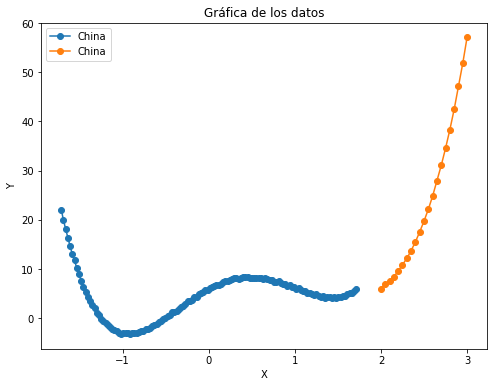

In [118]:
plt.figure(figsize=(8, 6))
plt.title("Gráfica de los datos")
plt.plot(data, y_train, '-o', label="China")
plt.plot(datosP1['X_test'], datosP1['Y_test'], '-o', label="China")
plt.ylabel("Y")
plt.xlabel("X")
plt.legend()

In [119]:
lasso_model = Lasso(alpha=0.9,normalize=True, max_iter=1e9)

lasso_model.fit(datosP1["X_training"], y_train)

ValueError: Expected 2D array, got 1D array instead:
array=[-2.   -1.97 -1.94 -1.91 -1.88 -1.85 -1.82 -1.79 -1.76 -1.73 -1.7  -1.67
 -1.64 -1.61 -1.58 -1.55 -1.52 -1.49 -1.46 -1.43 -1.4  -1.37 -1.34 -1.31
 -1.28 -1.25 -1.22 -1.19 -1.16 -1.13 -1.1  -1.07 -1.04 -1.01 -0.98 -0.95
 -0.92 -0.89 -0.86 -0.83 -0.8  -0.77 -0.74 -0.71 -0.68 -0.65 -0.62 -0.59
 -0.56 -0.53 -0.5  -0.47 -0.44 -0.41 -0.38 -0.35 -0.32 -0.29 -0.26 -0.23
 -0.2  -0.17 -0.14 -0.11 -0.08 -0.05 -0.02  0.01  0.04  0.07  0.1   0.13
  0.16  0.19  0.22  0.25  0.28  0.31  0.34  0.37  0.4   0.43  0.46  0.49
  0.52  0.55  0.58  0.61  0.64  0.67  0.7   0.73  0.76  0.79  0.82  0.85
  0.88  0.91  0.94  0.97  1.    1.03  1.06  1.09  1.12  1.15  1.18  1.21
  1.24  1.27  1.3   1.33  1.36  1.39  1.42  1.45  1.48  1.51  1.54  1.57
  1.6   1.63  1.66  1.69  1.72  1.75  1.78  1.81  1.84  1.87  1.9   1.93
  1.96  1.99].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [106]:
lasso_model.predict(pruebaP1)

array([4.4670584, 4.4670584, 4.4670584, 4.4670584, 4.4670584, 4.4670584,
       4.4670584, 4.4670584, 4.4670584, 4.4670584, 4.4670584, 4.4670584,
       4.4670584, 4.4670584, 4.4670584, 4.4670584, 4.4670584, 4.4670584,
       4.4670584, 4.4670584, 4.4670584])

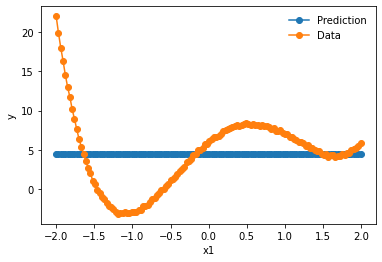

In [107]:
plt.plot(datosP1["X_training"], lasso_model.predict(data),'-o', label='Prediction')
plt.plot(datosP1["X_training"], datosP1["Y_training"],'-o', label='Data')
plt.legend(loc='best', frameon=False)
plt.xlabel('x1')
plt.ylabel('y')
plt.show()

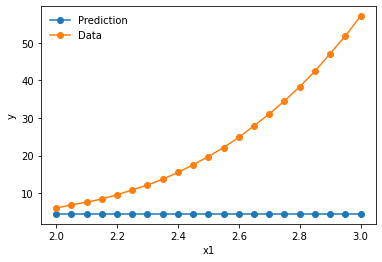

In [58]:
plt.plot(pruebaP1["X_test"], lasso_model.predict(pruebaP1),'-o', label='Prediction')
plt.plot(datosP1["X_test"], datosP1["Y_test"],'-o', label='Data')
plt.legend(loc='best', frameon=False)
plt.xlabel('x1')
plt.ylabel('y')
plt.show()

In [9]:
data

,X_training
0,-2.00
1,-1.97
2,-1.94
3,-1.91
4,-1.88
...,...
129,1.87
130,1.90
131,1.93
132,1.96


In [10]:
data

,X_training
0,-2.00
1,-1.97
2,-1.94
3,-1.91
4,-1.88
...,...
129,1.87
130,1.90
131,1.93
132,1.96


In [11]:
linear_model = LinearRegression(normalize=True)
linear_model.fit(data,datosP1.Y_training)

LinearRegression(normalize=True)

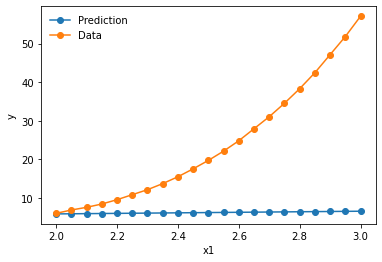

In [12]:
plt.plot(pruebaP1["X_test"], linear_model.predict(pruebaP1),'-o', label='Prediction')
plt.plot(datosP1["X_test"], datosP1["Y_test"],'-o', label='Data')
plt.legend(loc='best', frameon=False)
plt.xlabel('x1')
plt.ylabel('y')
plt.show()


In [41]:
datosP1.X_training

0     -2.00
1     -1.97
2     -1.94
3     -1.91
4     -1.88
       ... 
129    1.87
130    1.90
131    1.93
132    1.96
133    1.99
Name: X_training, Length: 134, dtype: float64

In [42]:
coef = poly.polyfit(datosP1["X_training"], datosP1["Y_training"], 8,rcond=None,w=None)


In [43]:
model = poly.Polynomial(coef)
model

Polynomial([ 6.00793895e+00,  8.03796810e+00, -6.06320867e+00, -3.02503500e+00,
        2.09500406e+00,  8.00105182e-03, -4.29431659e-02, -1.12113794e-03,
        5.73512923e-03], domain=[-1,  1], window=[-1,  1])

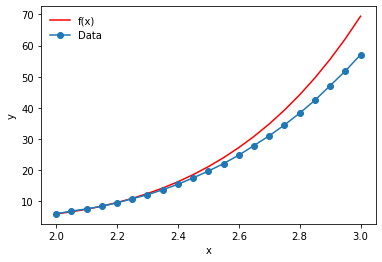

In [45]:
plt.plot(pruebaP1["X_test"], model(pruebaP1["X_test"]),'r', label='f(x)')
plt.plot(datosP1["X_test"], datosP1["Y_test"],'-o', label='Data')
plt.legend(loc='best', frameon=False)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

## Punto 2



In [198]:
amp_xtrain = np.array([[0,0],[0,1],[1,0],[1,1]])
amp_ytrain = np.array([[1],[1],[1],[0]])

ampModel = Sequential()
ampModel.add(Dense(16, activation='relu',input_dim=2))
ampModel.add(Dense(16, activation='relu'))
ampModel.add(Dense(1, activation='sigmoid'))
    
ampModel.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])

ampModel.fit(amp_xtrain, amp_ytrain, epochs=2500)


Epoch 1/2500
1/1 [==============================] - 1s 571ms/step - loss: 0.2348 - mae: 0.4744
Epoch 2/2500
1/1 [==============================] - 0s 7ms/step - loss: 0.2299 - mae: 0.4691
Epoch 3/2500
1/1 [==============================] - 0s 7ms/step - loss: 0.2262 - mae: 0.4651
Epoch 4/2500
1/1 [==============================] - 0s 34ms/step - loss: 0.2232 - mae: 0.4618
Epoch 5/2500
1/1 [==============================] - 0s 7ms/step - loss: 0.2206 - mae: 0.4589
Epoch 6/2500
1/1 [==============================] - 0s 23ms/step - loss: 0.2185 - mae: 0.4566
Epoch 7/2500
1/1 [==============================] - 0s 8ms/step - loss: 0.2168 - mae: 0.4546
Epoch 8/2500
1/1 [==============================] - 0s 28ms/step - loss: 0.2152 - mae: 0.4528
Epoch 9/2500
1/1 [==============================] - 0s 8ms/step - loss: 0.2137 - mae: 0.4510
Epoch 10/2500
1/1 [==============================] - 0s 13ms/step - loss: 0.2122 - mae: 0.4493
Epoch 11/2500
1/1 [==============================] - 0s 14ms/st

1/1 [==============================] - 0s 7ms/step - loss: 0.1403 - mae: 0.3482
Epoch 88/2500
1/1 [==============================] - 0s 6ms/step - loss: 0.1395 - mae: 0.3469
Epoch 89/2500
1/1 [==============================] - 0s 13ms/step - loss: 0.1387 - mae: 0.3457
Epoch 90/2500
1/1 [==============================] - 0s 7ms/step - loss: 0.1377 - mae: 0.3442
Epoch 91/2500
1/1 [==============================] - 0s 5ms/step - loss: 0.1370 - mae: 0.3428
Epoch 92/2500
1/1 [==============================] - 0s 9ms/step - loss: 0.1361 - mae: 0.3414
Epoch 93/2500
1/1 [==============================] - 0s 15ms/step - loss: 0.1353 - mae: 0.3402
Epoch 94/2500
1/1 [==============================] - 0s 16ms/step - loss: 0.1344 - mae: 0.3389
Epoch 95/2500
1/1 [==============================] - ETA: 0s - loss: 0.1337 - mae: 0.337 - 0s 11ms/step - loss: 0.1337 - mae: 0.3378
Epoch 96/2500
1/1 [==============================] - 0s 15ms/step - loss: 0.1327 - mae: 0.3361
Epoch 97/2500
1/1 [============

1/1 [==============================] - 0s 4ms/step - loss: 0.0770 - mae: 0.2430
Epoch 173/2500
1/1 [==============================] - 0s 7ms/step - loss: 0.0763 - mae: 0.2416
Epoch 174/2500
1/1 [==============================] - 0s 4ms/step - loss: 0.0757 - mae: 0.2409
Epoch 175/2500
1/1 [==============================] - 0s 5ms/step - loss: 0.0750 - mae: 0.2396
Epoch 176/2500
1/1 [==============================] - 0s 25ms/step - loss: 0.0744 - mae: 0.2387
Epoch 177/2500
1/1 [==============================] - 0s 3ms/step - loss: 0.0737 - mae: 0.2377
Epoch 178/2500
1/1 [==============================] - 0s 15ms/step - loss: 0.0729 - mae: 0.2361
Epoch 179/2500
1/1 [==============================] - 0s 12ms/step - loss: 0.0722 - mae: 0.2348
Epoch 180/2500
1/1 [==============================] - 0s 10ms/step - loss: 0.0716 - mae: 0.2337
Epoch 181/2500
1/1 [==============================] - 0s 4ms/step - loss: 0.0709 - mae: 0.2322
Epoch 182/2500
1/1 [==============================] - 0s 9ms/

1/1 [==============================] - 0s 9ms/step - loss: 0.0309 - mae: 0.1470
Epoch 259/2500
1/1 [==============================] - 0s 5ms/step - loss: 0.0304 - mae: 0.1458
Epoch 260/2500
1/1 [==============================] - 0s 4ms/step - loss: 0.0301 - mae: 0.1448
Epoch 261/2500
1/1 [==============================] - 0s 7ms/step - loss: 0.0297 - mae: 0.1438
Epoch 262/2500
1/1 [==============================] - 0s 16ms/step - loss: 0.0293 - mae: 0.1427
Epoch 263/2500
1/1 [==============================] - 0s 9ms/step - loss: 0.0289 - mae: 0.1417
Epoch 264/2500
1/1 [==============================] - 0s 19ms/step - loss: 0.0286 - mae: 0.1407
Epoch 265/2500
1/1 [==============================] - 0s 10ms/step - loss: 0.0282 - mae: 0.1394
Epoch 266/2500
1/1 [==============================] - 0s 13ms/step - loss: 0.0279 - mae: 0.1389
Epoch 267/2500
1/1 [==============================] - 0s 7ms/step - loss: 0.0274 - mae: 0.1375
Epoch 268/2500
1/1 [==============================] - 0s 8ms/

Epoch 344/2500
1/1 [==============================] - 0s 15ms/step - loss: 0.0084 - mae: 0.0731
Epoch 345/2500
1/1 [==============================] - 0s 3ms/step - loss: 0.0083 - mae: 0.0725
Epoch 346/2500
1/1 [==============================] - 0s 22ms/step - loss: 0.0081 - mae: 0.0721
Epoch 347/2500
1/1 [==============================] - 0s 4ms/step - loss: 0.0080 - mae: 0.0712
Epoch 348/2500
1/1 [==============================] - 0s 9ms/step - loss: 0.0078 - mae: 0.0706
Epoch 349/2500
1/1 [==============================] - 0s 9ms/step - loss: 0.0077 - mae: 0.0700
Epoch 350/2500
1/1 [==============================] - 0s 12ms/step - loss: 0.0075 - mae: 0.0694
Epoch 351/2500
1/1 [==============================] - 0s 12ms/step - loss: 0.0074 - mae: 0.0687
Epoch 352/2500
1/1 [==============================] - 0s 12ms/step - loss: 0.0073 - mae: 0.0680
Epoch 353/2500
1/1 [==============================] - 0s 18ms/step - loss: 0.0071 - mae: 0.0674
Epoch 354/2500
1/1 [========================

1/1 [==============================] - 0s 8ms/step - loss: 0.0015 - mae: 0.0303
Epoch 430/2500
1/1 [==============================] - 0s 4ms/step - loss: 0.0015 - mae: 0.0300
Epoch 431/2500
1/1 [==============================] - 0s 76ms/step - loss: 0.0014 - mae: 0.0295
Epoch 432/2500
1/1 [==============================] - 0s 6ms/step - loss: 0.0014 - mae: 0.0293
Epoch 433/2500
1/1 [==============================] - 0s 34ms/step - loss: 0.0014 - mae: 0.0288
Epoch 434/2500
1/1 [==============================] - 0s 31ms/step - loss: 0.0013 - mae: 0.0285
Epoch 435/2500
1/1 [==============================] - 0s 16ms/step - loss: 0.0013 - mae: 0.0283
Epoch 436/2500
1/1 [==============================] - 0s 83ms/step - loss: 0.0013 - mae: 0.0279
Epoch 437/2500
1/1 [==============================] - 0s 20ms/step - loss: 0.0012 - mae: 0.0276
Epoch 438/2500
1/1 [==============================] - 0s 14ms/step - loss: 0.0012 - mae: 0.0272
Epoch 439/2500
1/1 [==============================] - 0s 1

1/1 [==============================] - 0s 12ms/step - loss: 1.8564e-04 - mae: 0.0107
Epoch 512/2500
1/1 [==============================] - 0s 16ms/step - loss: 1.8066e-04 - mae: 0.0106
Epoch 513/2500
1/1 [==============================] - 0s 34ms/step - loss: 1.7624e-04 - mae: 0.0104
Epoch 514/2500
1/1 [==============================] - 0s 7ms/step - loss: 1.7062e-04 - mae: 0.0103
Epoch 515/2500
1/1 [==============================] - 0s 7ms/step - loss: 1.6755e-04 - mae: 0.0101
Epoch 516/2500
1/1 [==============================] - 0s 6ms/step - loss: 1.6384e-04 - mae: 0.0101
Epoch 517/2500
1/1 [==============================] - 0s 5ms/step - loss: 1.5731e-04 - mae: 0.0099
Epoch 518/2500
1/1 [==============================] - 0s 9ms/step - loss: 1.5283e-04 - mae: 0.0097
Epoch 519/2500
1/1 [==============================] - 0s 12ms/step - loss: 1.5102e-04 - mae: 0.0097
Epoch 520/2500
1/1 [==============================] - 0s 17ms/step - loss: 1.4504e-04 - mae: 0.0095
Epoch 521/2500
1/1 [

1/1 [==============================] - 0s 6ms/step - loss: 1.7391e-05 - mae: 0.0033
Epoch 593/2500
1/1 [==============================] - 0s 5ms/step - loss: 1.6969e-05 - mae: 0.0033
Epoch 594/2500
1/1 [==============================] - 0s 4ms/step - loss: 1.6385e-05 - mae: 0.0032
Epoch 595/2500
1/1 [==============================] - 0s 5ms/step - loss: 1.5820e-05 - mae: 0.0032
Epoch 596/2500
1/1 [==============================] - 0s 4ms/step - loss: 1.5355e-05 - mae: 0.0031
Epoch 597/2500
1/1 [==============================] - 0s 7ms/step - loss: 1.5102e-05 - mae: 0.0031
Epoch 598/2500
1/1 [==============================] - 0s 9ms/step - loss: 1.4468e-05 - mae: 0.0030
Epoch 599/2500
1/1 [==============================] - 0s 9ms/step - loss: 1.3977e-05 - mae: 0.0030
Epoch 600/2500
1/1 [==============================] - 0s 5ms/step - loss: 1.3602e-05 - mae: 0.0030
Epoch 601/2500
1/1 [==============================] - 0s 4ms/step - loss: 1.3244e-05 - mae: 0.0029
Epoch 602/2500
1/1 [=====

1/1 [==============================] - 0s 12ms/step - loss: 1.3556e-06 - mae: 9.6276e-04
Epoch 675/2500
1/1 [==============================] - 0s 5ms/step - loss: 1.2984e-06 - mae: 9.4163e-04
Epoch 676/2500
1/1 [==============================] - 0s 10ms/step - loss: 1.2596e-06 - mae: 9.2364e-04
Epoch 677/2500
1/1 [==============================] - 0s 4ms/step - loss: 1.2386e-06 - mae: 9.2320e-04
Epoch 678/2500
1/1 [==============================] - 0s 3ms/step - loss: 1.1837e-06 - mae: 9.0035e-04
Epoch 679/2500
1/1 [==============================] - 0s 4ms/step - loss: 1.1432e-06 - mae: 8.8309e-04
Epoch 680/2500
1/1 [==============================] - 0s 4ms/step - loss: 1.1130e-06 - mae: 8.7494e-04
Epoch 681/2500
1/1 [==============================] - 0s 10ms/step - loss: 1.0753e-06 - mae: 8.5930e-04
Epoch 682/2500
1/1 [==============================] - 0s 5ms/step - loss: 1.0420e-06 - mae: 8.4472e-04
Epoch 683/2500
1/1 [==============================] - 0s 2ms/step - loss: 1.0115e-06 

1/1 [==============================] - 0s 16ms/step - loss: 1.3421e-07 - mae: 3.1169e-04
Epoch 754/2500
1/1 [==============================] - 0s 11ms/step - loss: 1.2982e-07 - mae: 3.0618e-04
Epoch 755/2500
1/1 [==============================] - 0s 24ms/step - loss: 1.2702e-07 - mae: 3.0278e-04
Epoch 756/2500
1/1 [==============================] - 0s 10ms/step - loss: 1.2418e-07 - mae: 2.9992e-04
Epoch 757/2500
1/1 [==============================] - 0s 12ms/step - loss: 1.2110e-07 - mae: 2.9609e-04
Epoch 758/2500
1/1 [==============================] - 0s 5ms/step - loss: 1.1853e-07 - mae: 2.9333e-04
Epoch 759/2500
1/1 [==============================] - 0s 12ms/step - loss: 1.1491e-07 - mae: 2.8796e-04
Epoch 760/2500
1/1 [==============================] - 0s 27ms/step - loss: 1.1312e-07 - mae: 2.8715e-04
Epoch 761/2500
1/1 [==============================] - 0s 17ms/step - loss: 1.1009e-07 - mae: 2.8194e-04
Epoch 762/2500
1/1 [==============================] - 0s 28ms/step - loss: 1.079

1/1 [==============================] - 0s 11ms/step - loss: 2.8137e-08 - mae: 1.4372e-04
Epoch 833/2500
1/1 [==============================] - 0s 4ms/step - loss: 2.7946e-08 - mae: 1.4355e-04
Epoch 834/2500
1/1 [==============================] - 0s 6ms/step - loss: 2.7310e-08 - mae: 1.4193e-04
Epoch 835/2500
1/1 [==============================] - 0s 10ms/step - loss: 2.6958e-08 - mae: 1.4068e-04
Epoch 836/2500
1/1 [==============================] - 0s 5ms/step - loss: 2.6666e-08 - mae: 1.4033e-04
Epoch 837/2500
1/1 [==============================] - 0s 4ms/step - loss: 2.6149e-08 - mae: 1.3870e-04
Epoch 838/2500
1/1 [==============================] - 0s 4ms/step - loss: 2.5944e-08 - mae: 1.3842e-04
Epoch 839/2500
1/1 [==============================] - 0s 4ms/step - loss: 2.5450e-08 - mae: 1.3696e-04
Epoch 840/2500
1/1 [==============================] - 0s 5ms/step - loss: 2.5111e-08 - mae: 1.3586e-04
Epoch 841/2500
1/1 [==============================] - 0s 4ms/step - loss: 2.4976e-08 -

1/1 [==============================] - 0s 9ms/step - loss: 1.1849e-08 - mae: 9.3617e-05
Epoch 911/2500
1/1 [==============================] - 0s 21ms/step - loss: 1.1743e-08 - mae: 9.3162e-05
Epoch 912/2500
1/1 [==============================] - 0s 16ms/step - loss: 1.1650e-08 - mae: 9.2849e-05
Epoch 913/2500
1/1 [==============================] - 0s 9ms/step - loss: 1.1539e-08 - mae: 9.2380e-05
Epoch 914/2500
1/1 [==============================] - 0s 9ms/step - loss: 1.1483e-08 - mae: 9.2044e-05
Epoch 915/2500
1/1 [==============================] - 0s 9ms/step - loss: 1.1447e-08 - mae: 9.2171e-05
Epoch 916/2500
1/1 [==============================] - 0s 6ms/step - loss: 1.1282e-08 - mae: 9.1411e-05
Epoch 917/2500
1/1 [==============================] - 0s 11ms/step - loss: 1.1194e-08 - mae: 9.0919e-05
Epoch 918/2500
1/1 [==============================] - 0s 9ms/step - loss: 1.1111e-08 - mae: 9.0733e-05
Epoch 919/2500
1/1 [==============================] - 0s 5ms/step - loss: 1.1011e-08 

1/1 [==============================] - 0s 4ms/step - loss: 6.9279e-09 - mae: 7.1690e-05
Epoch 990/2500
1/1 [==============================] - 0s 4ms/step - loss: 6.8703e-09 - mae: 7.1350e-05
Epoch 991/2500
1/1 [==============================] - 0s 5ms/step - loss: 6.8317e-09 - mae: 7.1137e-05
Epoch 992/2500
1/1 [==============================] - 0s 8ms/step - loss: 6.7949e-09 - mae: 7.0916e-05
Epoch 993/2500
1/1 [==============================] - 0s 8ms/step - loss: 6.7756e-09 - mae: 7.0882e-05
Epoch 994/2500
1/1 [==============================] - 0s 15ms/step - loss: 6.7148e-09 - mae: 7.0529e-05
Epoch 995/2500
1/1 [==============================] - 0s 10ms/step - loss: 6.6836e-09 - mae: 7.0309e-05
Epoch 996/2500
1/1 [==============================] - 0s 12ms/step - loss: 6.6546e-09 - mae: 7.0216e-05
Epoch 997/2500
1/1 [==============================] - 0s 6ms/step - loss: 6.6029e-09 - mae: 6.9912e-05
Epoch 998/2500
1/1 [==============================] - 0s 9ms/step - loss: 6.5741e-09 

1/1 [==============================] - 0s 5ms/step - loss: 4.7526e-09 - mae: 5.9315e-05
Epoch 1068/2500
1/1 [==============================] - 0s 6ms/step - loss: 4.7418e-09 - mae: 5.9275e-05
Epoch 1069/2500
1/1 [==============================] - 0s 7ms/step - loss: 4.7151e-09 - mae: 5.9071e-05
Epoch 1070/2500
1/1 [==============================] - 0s 6ms/step - loss: 4.6977e-09 - mae: 5.8961e-05
Epoch 1071/2500
1/1 [==============================] - 0s 5ms/step - loss: 4.6904e-09 - mae: 5.8962e-05
Epoch 1072/2500
1/1 [==============================] - 0s 5ms/step - loss: 4.6641e-09 - mae: 5.8788e-05
Epoch 1073/2500
1/1 [==============================] - 0s 6ms/step - loss: 4.6379e-09 - mae: 5.8618e-05
Epoch 1074/2500
1/1 [==============================] - 0s 6ms/step - loss: 4.6347e-09 - mae: 5.8557e-05
Epoch 1075/2500
1/1 [==============================] - 0s 5ms/step - loss: 4.6175e-09 - mae: 5.8502e-05
Epoch 1076/2500
1/1 [==============================] - 0s 6ms/step - loss: 4.591

1/1 [==============================] - 0s 8ms/step - loss: 3.6067e-09 - mae: 5.1713e-05
Epoch 1145/2500
1/1 [==============================] - 0s 5ms/step - loss: 3.5911e-09 - mae: 5.1597e-05
Epoch 1146/2500
1/1 [==============================] - 0s 6ms/step - loss: 3.5773e-09 - mae: 5.1497e-05
Epoch 1147/2500
1/1 [==============================] - 0s 4ms/step - loss: 3.5679e-09 - mae: 5.1437e-05
Epoch 1148/2500
1/1 [==============================] - 0s 9ms/step - loss: 3.5558e-09 - mae: 5.1324e-05
Epoch 1149/2500
1/1 [==============================] - 0s 5ms/step - loss: 3.5515e-09 - mae: 5.1328e-05
Epoch 1150/2500
1/1 [==============================] - 0s 5ms/step - loss: 3.5347e-09 - mae: 5.1203e-05
Epoch 1151/2500
1/1 [==============================] - 0s 8ms/step - loss: 3.5239e-09 - mae: 5.1099e-05
Epoch 1152/2500
1/1 [==============================] - 0s 5ms/step - loss: 3.5125e-09 - mae: 5.1050e-05
Epoch 1153/2500
1/1 [==============================] - ETA: 0s - loss: 3.5028e-0

1/1 [==============================] - 0s 5ms/step - loss: 2.8777e-09 - mae: 4.6167e-05
Epoch 1223/2500
1/1 [==============================] - 0s 5ms/step - loss: 2.8708e-09 - mae: 4.6153e-05
Epoch 1224/2500
1/1 [==============================] - 0s 6ms/step - loss: 2.8612e-09 - mae: 4.6063e-05
Epoch 1225/2500
1/1 [==============================] - 0s 5ms/step - loss: 2.8535e-09 - mae: 4.5986e-05
Epoch 1226/2500
1/1 [==============================] - 0s 5ms/step - loss: 2.8473e-09 - mae: 4.5978e-05
Epoch 1227/2500
1/1 [==============================] - 0s 5ms/step - loss: 2.8359e-09 - mae: 4.5848e-05
Epoch 1228/2500
1/1 [==============================] - 0s 5ms/step - loss: 2.8324e-09 - mae: 4.5833e-05
Epoch 1229/2500
1/1 [==============================] - 0s 5ms/step - loss: 2.8239e-09 - mae: 4.5777e-05
Epoch 1230/2500
1/1 [==============================] - 0s 5ms/step - loss: 2.8150e-09 - mae: 4.5685e-05
Epoch 1231/2500
1/1 [==============================] - 0s 5ms/step - loss: 2.808

1/1 [==============================] - 0s 5ms/step - loss: 2.3826e-09 - mae: 4.2040e-05
Epoch 1301/2500
1/1 [==============================] - 0s 15ms/step - loss: 2.3754e-09 - mae: 4.1967e-05
Epoch 1302/2500
1/1 [==============================] - 0s 4ms/step - loss: 2.3696e-09 - mae: 4.1921e-05
Epoch 1303/2500
1/1 [==============================] - 0s 4ms/step - loss: 2.3702e-09 - mae: 4.1947e-05
Epoch 1304/2500
1/1 [==============================] - 0s 8ms/step - loss: 2.3614e-09 - mae: 4.1860e-05
Epoch 1305/2500
1/1 [==============================] - 0s 25ms/step - loss: 2.3546e-09 - mae: 4.1801e-05
Epoch 1306/2500
1/1 [==============================] - 0s 17ms/step - loss: 2.3494e-09 - mae: 4.1712e-05
Epoch 1307/2500
1/1 [==============================] - 0s 6ms/step - loss: 2.3486e-09 - mae: 4.1731e-05
Epoch 1308/2500
1/1 [==============================] - 0s 17ms/step - loss: 2.3410e-09 - mae: 4.1686e-05
Epoch 1309/2500
1/1 [==============================] - 0s 21ms/step - loss: 

1/1 [==============================] - 0s 23ms/step - loss: 2.0251e-09 - mae: 3.8743e-05
Epoch 1379/2500
1/1 [==============================] - 0s 11ms/step - loss: 2.0257e-09 - mae: 3.8762e-05
Epoch 1380/2500
1/1 [==============================] - 0s 4ms/step - loss: 2.0183e-09 - mae: 3.8683e-05
Epoch 1381/2500
1/1 [==============================] - 0s 15ms/step - loss: 2.0162e-09 - mae: 3.8672e-05
Epoch 1382/2500
1/1 [==============================] - 0s 6ms/step - loss: 2.0129e-09 - mae: 3.8631e-05
Epoch 1383/2500
1/1 [==============================] - 0s 8ms/step - loss: 2.0101e-09 - mae: 3.8613e-05
Epoch 1384/2500
1/1 [==============================] - 0s 8ms/step - loss: 2.0040e-09 - mae: 3.8553e-05
Epoch 1385/2500
1/1 [==============================] - 0s 26ms/step - loss: 2.0000e-09 - mae: 3.8510e-05
Epoch 1386/2500
1/1 [==============================] - 0s 11ms/step - loss: 1.9965e-09 - mae: 3.8486e-05
Epoch 1387/2500
1/1 [==============================] - 0s 13ms/step - loss:

1/1 [==============================] - 0s 18ms/step - loss: 1.7653e-09 - mae: 3.6191e-05
Epoch 1456/2500
1/1 [==============================] - 0s 13ms/step - loss: 1.7615e-09 - mae: 3.6134e-05
Epoch 1457/2500
1/1 [==============================] - 0s 11ms/step - loss: 1.7589e-09 - mae: 3.6109e-05
Epoch 1458/2500
1/1 [==============================] - 0s 14ms/step - loss: 1.7580e-09 - mae: 3.6092e-05
Epoch 1459/2500
1/1 [==============================] - 0s 5ms/step - loss: 1.7511e-09 - mae: 3.6041e-05
Epoch 1460/2500
1/1 [==============================] - 0s 7ms/step - loss: 1.7504e-09 - mae: 3.6005e-05
Epoch 1461/2500
1/1 [==============================] - 0s 10ms/step - loss: 1.7484e-09 - mae: 3.5995e-05
Epoch 1462/2500
1/1 [==============================] - 0s 5ms/step - loss: 1.7443e-09 - mae: 3.5946e-05
Epoch 1463/2500
1/1 [==============================] - 0s 13ms/step - loss: 1.7396e-09 - mae: 3.5895e-05
Epoch 1464/2500
1/1 [==============================] - 0s 14ms/step - loss

1/1 [==============================] - 0s 4ms/step - loss: 1.5581e-09 - mae: 3.3991e-05
Epoch 1533/2500
1/1 [==============================] - 0s 6ms/step - loss: 1.5582e-09 - mae: 3.3973e-05
Epoch 1534/2500
1/1 [==============================] - 0s 9ms/step - loss: 1.5528e-09 - mae: 3.3922e-05
Epoch 1535/2500
1/1 [==============================] - 0s 7ms/step - loss: 1.5519e-09 - mae: 3.3899e-05
Epoch 1536/2500
1/1 [==============================] - 0s 6ms/step - loss: 1.5498e-09 - mae: 3.3880e-05
Epoch 1537/2500
1/1 [==============================] - 0s 4ms/step - loss: 1.5478e-09 - mae: 3.3859e-05
Epoch 1538/2500
1/1 [==============================] - 0s 10ms/step - loss: 1.5453e-09 - mae: 3.3845e-05
Epoch 1539/2500
1/1 [==============================] - 0s 7ms/step - loss: 1.5428e-09 - mae: 3.3796e-05
Epoch 1540/2500
1/1 [==============================] - 0s 4ms/step - loss: 1.5413e-09 - mae: 3.3791e-05
Epoch 1541/2500
1/1 [==============================] - 0s 5ms/step - loss: 1.53

1/1 [==============================] - 0s 11ms/step - loss: 1.3935e-09 - mae: 3.2147e-05
Epoch 1611/2500
1/1 [==============================] - 0s 15ms/step - loss: 1.3919e-09 - mae: 3.2130e-05
Epoch 1612/2500
1/1 [==============================] - 0s 6ms/step - loss: 1.3885e-09 - mae: 3.2057e-05
Epoch 1613/2500
1/1 [==============================] - 0s 4ms/step - loss: 1.3899e-09 - mae: 3.2099e-05
Epoch 1614/2500
1/1 [==============================] - 0s 3ms/step - loss: 1.3840e-09 - mae: 3.2005e-05
Epoch 1615/2500
1/1 [==============================] - 0s 4ms/step - loss: 1.3837e-09 - mae: 3.2007e-05
Epoch 1616/2500
1/1 [==============================] - 0s 5ms/step - loss: 1.3823e-09 - mae: 3.1983e-05
Epoch 1617/2500
1/1 [==============================] - 0s 10ms/step - loss: 1.3816e-09 - mae: 3.2016e-05
Epoch 1618/2500
1/1 [==============================] - 0s 9ms/step - loss: 1.3796e-09 - mae: 3.1965e-05
Epoch 1619/2500
1/1 [==============================] - 0s 8ms/step - loss: 1.

1/1 [==============================] - 0s 5ms/step - loss: 1.2560e-09 - mae: 3.0503e-05
Epoch 1689/2500
1/1 [==============================] - 0s 4ms/step - loss: 1.2569e-09 - mae: 3.0536e-05
Epoch 1690/2500
1/1 [==============================] - 0s 5ms/step - loss: 1.2539e-09 - mae: 3.0483e-05
Epoch 1691/2500
1/1 [==============================] - 0s 10ms/step - loss: 1.2559e-09 - mae: 3.0499e-05
Epoch 1692/2500
1/1 [==============================] - 0s 7ms/step - loss: 1.2502e-09 - mae: 3.0408e-05
Epoch 1693/2500
1/1 [==============================] - 0s 4ms/step - loss: 1.2493e-09 - mae: 3.0395e-05
Epoch 1694/2500
1/1 [==============================] - 0s 6ms/step - loss: 1.2495e-09 - mae: 3.0435e-05
Epoch 1695/2500
1/1 [==============================] - 0s 6ms/step - loss: 1.2459e-09 - mae: 3.0371e-05
Epoch 1696/2500
1/1 [==============================] - 0s 6ms/step - loss: 1.2460e-09 - mae: 3.0375e-05
Epoch 1697/2500
1/1 [==============================] - 0s 10ms/step - loss: 1.2

1/1 [==============================] - 0s 6ms/step - loss: 1.1461e-09 - mae: 2.9132e-05
Epoch 1767/2500
1/1 [==============================] - 0s 5ms/step - loss: 1.1433e-09 - mae: 2.9097e-05
Epoch 1768/2500
1/1 [==============================] - 0s 6ms/step - loss: 1.1428e-09 - mae: 2.9100e-05
Epoch 1769/2500
1/1 [==============================] - 0s 6ms/step - loss: 1.1449e-09 - mae: 2.9140e-05
Epoch 1770/2500
1/1 [==============================] - 0s 7ms/step - loss: 1.1414e-09 - mae: 2.9077e-05
Epoch 1771/2500
1/1 [==============================] - 0s 6ms/step - loss: 1.1415e-09 - mae: 2.9083e-05
Epoch 1772/2500
1/1 [==============================] - 0s 6ms/step - loss: 1.1387e-09 - mae: 2.9039e-05
Epoch 1773/2500
1/1 [==============================] - 0s 5ms/step - loss: 1.1377e-09 - mae: 2.9029e-05
Epoch 1774/2500
1/1 [==============================] - 0s 7ms/step - loss: 1.1352e-09 - mae: 2.8992e-05
Epoch 1775/2500
1/1 [==============================] - 0s 5ms/step - loss: 1.133

Epoch 1844/2500
1/1 [==============================] - 0s 10ms/step - loss: 1.0518e-09 - mae: 2.7919e-05
Epoch 1845/2500
1/1 [==============================] - 0s 6ms/step - loss: 1.0522e-09 - mae: 2.7934e-05
Epoch 1846/2500
1/1 [==============================] - 0s 10ms/step - loss: 1.0489e-09 - mae: 2.7886e-05
Epoch 1847/2500
1/1 [==============================] - 0s 10ms/step - loss: 1.0467e-09 - mae: 2.7837e-05
Epoch 1848/2500
1/1 [==============================] - 0s 5ms/step - loss: 1.0471e-09 - mae: 2.7859e-05
Epoch 1849/2500
1/1 [==============================] - 0s 6ms/step - loss: 1.0457e-09 - mae: 2.7840e-05
Epoch 1850/2500
1/1 [==============================] - 0s 5ms/step - loss: 1.0448e-09 - mae: 2.7801e-05
Epoch 1851/2500
1/1 [==============================] - 0s 12ms/step - loss: 1.0434e-09 - mae: 2.7811e-05
Epoch 1852/2500
1/1 [==============================] - 0s 7ms/step - loss: 1.0429e-09 - mae: 2.7777e-05
Epoch 1853/2500
1/1 [==============================] - 0s 5m

1/1 [==============================] - 0s 4ms/step - loss: 9.6932e-10 - mae: 2.6787e-05
Epoch 1923/2500
1/1 [==============================] - 0s 6ms/step - loss: 9.7002e-10 - mae: 2.6799e-05
Epoch 1924/2500
1/1 [==============================] - 0s 3ms/step - loss: 9.6894e-10 - mae: 2.6783e-05
Epoch 1925/2500
1/1 [==============================] - 0s 6ms/step - loss: 9.6873e-10 - mae: 2.6786e-05
Epoch 1926/2500
1/1 [==============================] - 0s 4ms/step - loss: 9.6883e-10 - mae: 2.6787e-05
Epoch 1927/2500
1/1 [==============================] - 0s 7ms/step - loss: 9.6686e-10 - mae: 2.6760e-05
Epoch 1928/2500
1/1 [==============================] - 0s 8ms/step - loss: 9.6462e-10 - mae: 2.6727e-05
Epoch 1929/2500
1/1 [==============================] - 0s 10ms/step - loss: 9.6571e-10 - mae: 2.6756e-05
Epoch 1930/2500
1/1 [==============================] - 0s 6ms/step - loss: 9.6347e-10 - mae: 2.6728e-05
Epoch 1931/2500
1/1 [==============================] - 0s 8ms/step - loss: 9.61

1/1 [==============================] - 0s 12ms/step - loss: 9.0182e-10 - mae: 2.5828e-05
Epoch 2001/2500
1/1 [==============================] - 0s 6ms/step - loss: 9.0070e-10 - mae: 2.5804e-05
Epoch 2002/2500
1/1 [==============================] - 0s 15ms/step - loss: 9.0113e-10 - mae: 2.5847e-05
Epoch 2003/2500
1/1 [==============================] - 0s 5ms/step - loss: 8.9992e-10 - mae: 2.5801e-05
Epoch 2004/2500
1/1 [==============================] - 0s 6ms/step - loss: 8.9953e-10 - mae: 2.5825e-05
Epoch 2005/2500
1/1 [==============================] - 0s 14ms/step - loss: 8.9837e-10 - mae: 2.5777e-05
Epoch 2006/2500
1/1 [==============================] - 0s 5ms/step - loss: 8.9623e-10 - mae: 2.5743e-05
Epoch 2007/2500
1/1 [==============================] - 0s 5ms/step - loss: 8.9717e-10 - mae: 2.5763e-05
Epoch 2008/2500
1/1 [==============================] - 0s 5ms/step - loss: 8.9509e-10 - mae: 2.5731e-05
Epoch 2009/2500
1/1 [==============================] - 0s 4ms/step - loss: 8.

1/1 [==============================] - 0s 9ms/step - loss: 8.4190e-10 - mae: 2.4968e-05
Epoch 2079/2500
1/1 [==============================] - 0s 11ms/step - loss: 8.4027e-10 - mae: 2.4967e-05
Epoch 2080/2500
1/1 [==============================] - 0s 7ms/step - loss: 8.4044e-10 - mae: 2.4945e-05
Epoch 2081/2500
1/1 [==============================] - ETA: 0s - loss: 8.4088e-10 - mae: 2.4950e-0 - 0s 40ms/step - loss: 8.4088e-10 - mae: 2.4950e-05
Epoch 2082/2500
1/1 [==============================] - 0s 31ms/step - loss: 8.3805e-10 - mae: 2.4936e-05
Epoch 2083/2500
1/1 [==============================] - 0s 13ms/step - loss: 8.3697e-10 - mae: 2.4919e-05
Epoch 2084/2500
1/1 [==============================] - 0s 10ms/step - loss: 8.3815e-10 - mae: 2.4943e-05
Epoch 2085/2500
1/1 [==============================] - 0s 8ms/step - loss: 8.3684e-10 - mae: 2.4916e-05
Epoch 2086/2500
1/1 [==============================] - 0s 4ms/step - loss: 8.3744e-10 - mae: 2.4903e-05
Epoch 2087/2500
1/1 [========

1/1 [==============================] - 0s 5ms/step - loss: 7.8876e-10 - mae: 2.4174e-05
Epoch 2157/2500
1/1 [==============================] - 0s 16ms/step - loss: 7.8870e-10 - mae: 2.4174e-05
Epoch 2158/2500
1/1 [==============================] - 0s 23ms/step - loss: 7.8811e-10 - mae: 2.4181e-05
Epoch 2159/2500
1/1 [==============================] - 0s 6ms/step - loss: 7.8558e-10 - mae: 2.4122e-05
Epoch 2160/2500
1/1 [==============================] - 0s 8ms/step - loss: 7.8741e-10 - mae: 2.4157e-05
Epoch 2161/2500
1/1 [==============================] - 0s 13ms/step - loss: 7.8557e-10 - mae: 2.4125e-05
Epoch 2162/2500
1/1 [==============================] - 0s 13ms/step - loss: 7.8463e-10 - mae: 2.4110e-05
Epoch 2163/2500
1/1 [==============================] - 0s 13ms/step - loss: 7.8319e-10 - mae: 2.4087e-05
Epoch 2164/2500
1/1 [==============================] - 0s 6ms/step - loss: 7.8406e-10 - mae: 2.4103e-05
Epoch 2165/2500
1/1 [==============================] - 0s 6ms/step - loss: 

1/1 [==============================] - 0s 5ms/step - loss: 7.4203e-10 - mae: 2.3456e-05
Epoch 2235/2500
1/1 [==============================] - 0s 5ms/step - loss: 7.4062e-10 - mae: 2.3419e-05
Epoch 2236/2500
1/1 [==============================] - 0s 6ms/step - loss: 7.3989e-10 - mae: 2.3404e-05
Epoch 2237/2500
1/1 [==============================] - 0s 5ms/step - loss: 7.3948e-10 - mae: 2.3397e-05
Epoch 2238/2500
1/1 [==============================] - 0s 7ms/step - loss: 7.3919e-10 - mae: 2.3395e-05
Epoch 2239/2500
1/1 [==============================] - 0s 27ms/step - loss: 7.3803e-10 - mae: 2.3377e-05
Epoch 2240/2500
1/1 [==============================] - 0s 27ms/step - loss: 7.3844e-10 - mae: 2.3371e-05
Epoch 2241/2500
1/1 [==============================] - 0s 4ms/step - loss: 7.3923e-10 - mae: 2.3401e-05
Epoch 2242/2500
1/1 [==============================] - 0s 14ms/step - loss: 7.3538e-10 - mae: 2.3333e-05
Epoch 2243/2500
1/1 [==============================] - 0s 27ms/step - loss: 7

1/1 [==============================] - 0s 8ms/step - loss: 6.9931e-10 - mae: 2.2760e-05
Epoch 2313/2500
1/1 [==============================] - 0s 13ms/step - loss: 6.9785e-10 - mae: 2.2725e-05
Epoch 2314/2500
1/1 [==============================] - 0s 16ms/step - loss: 6.9812e-10 - mae: 2.2741e-05
Epoch 2315/2500
1/1 [==============================] - 0s 7ms/step - loss: 6.9904e-10 - mae: 2.2762e-05
Epoch 2316/2500
1/1 [==============================] - 0s 16ms/step - loss: 6.9818e-10 - mae: 2.2732e-05
Epoch 2317/2500
1/1 [==============================] - 0s 15ms/step - loss: 6.9699e-10 - mae: 2.2711e-05
Epoch 2318/2500
1/1 [==============================] - 0s 10ms/step - loss: 6.9579e-10 - mae: 2.2694e-05
Epoch 2319/2500
1/1 [==============================] - 0s 12ms/step - loss: 6.9659e-10 - mae: 2.2708e-05
Epoch 2320/2500
1/1 [==============================] - 0s 16ms/step - loss: 6.9614e-10 - mae: 2.2714e-05
Epoch 2321/2500
1/1 [==============================] - 0s 8ms/step - loss

1/1 [==============================] - 0s 6ms/step - loss: 6.6166e-10 - mae: 2.2131e-05
Epoch 2391/2500
1/1 [==============================] - 0s 8ms/step - loss: 6.6105e-10 - mae: 2.2125e-05
Epoch 2392/2500
1/1 [==============================] - 0s 5ms/step - loss: 6.5953e-10 - mae: 2.2095e-05
Epoch 2393/2500
1/1 [==============================] - 0s 6ms/step - loss: 6.5912e-10 - mae: 2.2090e-05
Epoch 2394/2500
1/1 [==============================] - 0s 3ms/step - loss: 6.5905e-10 - mae: 2.2088e-05
Epoch 2395/2500
1/1 [==============================] - 0s 6ms/step - loss: 6.5935e-10 - mae: 2.2098e-05
Epoch 2396/2500
1/1 [==============================] - 0s 14ms/step - loss: 6.5948e-10 - mae: 2.2098e-05
Epoch 2397/2500
1/1 [==============================] - 0s 3ms/step - loss: 6.5971e-10 - mae: 2.2106e-05
Epoch 2398/2500
1/1 [==============================] - 0s 2ms/step - loss: 6.5811e-10 - mae: 2.2076e-05
Epoch 2399/2500
1/1 [==============================] - 0s 7ms/step - loss: 6.58

1/1 [==============================] - 0s 13ms/step - loss: 6.2763e-10 - mae: 2.1537e-05
Epoch 2469/2500
1/1 [==============================] - 0s 28ms/step - loss: 6.2807e-10 - mae: 2.1545e-05
Epoch 2470/2500
1/1 [==============================] - 0s 11ms/step - loss: 6.2569e-10 - mae: 2.1528e-05
Epoch 2471/2500
1/1 [==============================] - 0s 7ms/step - loss: 6.2803e-10 - mae: 2.1573e-05
Epoch 2472/2500
1/1 [==============================] - 0s 3ms/step - loss: 6.2608e-10 - mae: 2.1537e-05
Epoch 2473/2500
1/1 [==============================] - 0s 18ms/step - loss: 6.2665e-10 - mae: 2.1550e-05
Epoch 2474/2500
1/1 [==============================] - 0s 4ms/step - loss: 6.2485e-10 - mae: 2.1516e-05
Epoch 2475/2500
1/1 [==============================] - 0s 6ms/step - loss: 6.2572e-10 - mae: 2.1503e-05
Epoch 2476/2500
1/1 [==============================] - 0s 5ms/step - loss: 6.2444e-10 - mae: 2.1510e-05
Epoch 2477/2500
1/1 [==============================] - 0s 4ms/step - loss: 6

In [199]:
amp_predict = ampModel.predict(amp_xtrain)
print(amp_predict)

[[9.9999905e-01]
 [9.9997747e-01]
 [9.9997306e-01]
 [3.5090747e-05]]


In [190]:
dol_xtrain = np.array([[0,0],[0,1],[1,0],[1,1]])
dol_ytrain = np.array([[0],[0],[0],[1]])

dolModel = Sequential()
dolModel.add(Dense(15, activation='relu',input_dim=2))
dolModel.add(Dense(15, activation='relu'))
dolModel.add(Dense(1, activation='sigmoid'))
    
dolModel.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])

dolModel.fit(dol_xtrain, dol_ytrain, epochs=5000)

Epoch 1/5000
1/1 [==============================] - 1s 625ms/step - loss: 0.2810 - mae: 0.5207
Epoch 2/5000
1/1 [==============================] - 0s 19ms/step - loss: 0.2782 - mae: 0.5187
Epoch 3/5000
1/1 [==============================] - 0s 6ms/step - loss: 0.2761 - mae: 0.5173
Epoch 4/5000
1/1 [==============================] - 0s 5ms/step - loss: 0.2745 - mae: 0.5161
Epoch 5/5000
1/1 [==============================] - 0s 8ms/step - loss: 0.2731 - mae: 0.5150
Epoch 6/5000
1/1 [==============================] - 0s 8ms/step - loss: 0.2718 - mae: 0.5140
Epoch 7/5000
1/1 [==============================] - 0s 8ms/step - loss: 0.2706 - mae: 0.5131
Epoch 8/5000
1/1 [==============================] - 0s 7ms/step - loss: 0.2695 - mae: 0.5123
Epoch 9/5000
1/1 [==============================] - 0s 8ms/step - loss: 0.2684 - mae: 0.5115
Epoch 10/5000
1/1 [==============================] - 0s 7ms/step - loss: 0.2674 - mae: 0.5107
Epoch 11/5000
1/1 [==============================] - 0s 8ms/step -

1/1 [==============================] - 0s 3ms/step - loss: 0.2146 - mae: 0.4614
Epoch 89/5000
1/1 [==============================] - 0s 12ms/step - loss: 0.2141 - mae: 0.4608
Epoch 90/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2135 - mae: 0.4601
Epoch 91/5000
1/1 [==============================] - 0s 7ms/step - loss: 0.2129 - mae: 0.4595
Epoch 92/5000
1/1 [==============================] - 0s 5ms/step - loss: 0.2123 - mae: 0.4589
Epoch 93/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.2117 - mae: 0.4582
Epoch 94/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2111 - mae: 0.4576
Epoch 95/5000
1/1 [==============================] - 0s 11ms/step - loss: 0.2106 - mae: 0.4570
Epoch 96/5000
1/1 [==============================] - 0s 6ms/step - loss: 0.2100 - mae: 0.4563
Epoch 97/5000
1/1 [==============================] - 0s 7ms/step - loss: 0.2094 - mae: 0.4557
Epoch 98/5000
1/1 [==============================] - 0s 4ms/step - loss:

1/1 [==============================] - 0s 6ms/step - loss: 0.1657 - mae: 0.4045
Epoch 175/5000
1/1 [==============================] - 0s 6ms/step - loss: 0.1652 - mae: 0.4038
Epoch 176/5000
1/1 [==============================] - 0s 6ms/step - loss: 0.1646 - mae: 0.4031
Epoch 177/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.1641 - mae: 0.4025
Epoch 178/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.1635 - mae: 0.4017
Epoch 179/5000
1/1 [==============================] - 0s 5ms/step - loss: 0.1630 - mae: 0.4011
Epoch 180/5000
1/1 [==============================] - 0s 7ms/step - loss: 0.1624 - mae: 0.4004
Epoch 181/5000
1/1 [==============================] - 0s 5ms/step - loss: 0.1619 - mae: 0.3997
Epoch 182/5000
1/1 [==============================] - 0s 6ms/step - loss: 0.1614 - mae: 0.3990
Epoch 183/5000
1/1 [==============================] - 0s 5ms/step - loss: 0.1608 - mae: 0.3983
Epoch 184/5000
1/1 [==============================] - 0s 6ms/step

Epoch 260/5000
1/1 [==============================] - 0s 5ms/step - loss: 0.1218 - mae: 0.3452
Epoch 261/5000
1/1 [==============================] - 0s 13ms/step - loss: 0.1213 - mae: 0.3445
Epoch 262/5000
1/1 [==============================] - 0s 9ms/step - loss: 0.1209 - mae: 0.3438
Epoch 263/5000
1/1 [==============================] - 0s 7ms/step - loss: 0.1204 - mae: 0.3431
Epoch 264/5000
1/1 [==============================] - 0s 8ms/step - loss: 0.1199 - mae: 0.3424
Epoch 265/5000
1/1 [==============================] - 0s 14ms/step - loss: 0.1195 - mae: 0.3417
Epoch 266/5000
1/1 [==============================] - 0s 7ms/step - loss: 0.1190 - mae: 0.3410
Epoch 267/5000
1/1 [==============================] - 0s 7ms/step - loss: 0.1185 - mae: 0.3403
Epoch 268/5000
1/1 [==============================] - 0s 8ms/step - loss: 0.1180 - mae: 0.3396
Epoch 269/5000
1/1 [==============================] - 0s 7ms/step - loss: 0.1176 - mae: 0.3389
Epoch 270/5000
1/1 [============================

1/1 [==============================] - 0s 7ms/step - loss: 0.0848 - mae: 0.2854
Epoch 346/5000
1/1 [==============================] - 0s 11ms/step - loss: 0.0844 - mae: 0.2848
Epoch 347/5000
1/1 [==============================] - 0s 7ms/step - loss: 0.0840 - mae: 0.2840
Epoch 348/5000
1/1 [==============================] - 0s 11ms/step - loss: 0.0837 - mae: 0.2834
Epoch 349/5000
1/1 [==============================] - 0s 11ms/step - loss: 0.0833 - mae: 0.2826
Epoch 350/5000
1/1 [==============================] - 0s 11ms/step - loss: 0.0829 - mae: 0.2819
Epoch 351/5000
1/1 [==============================] - 0s 5ms/step - loss: 0.0825 - mae: 0.2812
Epoch 352/5000
1/1 [==============================] - 0s 10ms/step - loss: 0.0821 - mae: 0.2805
Epoch 353/5000
1/1 [==============================] - 0s 5ms/step - loss: 0.0817 - mae: 0.2798
Epoch 354/5000
1/1 [==============================] - 0s 12ms/step - loss: 0.0814 - mae: 0.2792
Epoch 355/5000
1/1 [==============================] - 0s 7m

1/1 [==============================] - 0s 4ms/step - loss: 0.0562 - mae: 0.2286
Epoch 430/5000
1/1 [==============================] - 0s 8ms/step - loss: 0.0559 - mae: 0.2280
Epoch 431/5000
1/1 [==============================] - 0s 10ms/step - loss: 0.0556 - mae: 0.2273
Epoch 432/5000
1/1 [==============================] - 0s 12ms/step - loss: 0.0553 - mae: 0.2267
Epoch 433/5000
1/1 [==============================] - 0s 9ms/step - loss: 0.0550 - mae: 0.2260
Epoch 434/5000
1/1 [==============================] - 0s 6ms/step - loss: 0.0548 - mae: 0.2254
Epoch 435/5000
1/1 [==============================] - 0s 13ms/step - loss: 0.0544 - mae: 0.2247
Epoch 436/5000
1/1 [==============================] - 0s 7ms/step - loss: 0.0542 - mae: 0.2241
Epoch 437/5000
1/1 [==============================] - 0s 6ms/step - loss: 0.0539 - mae: 0.2235
Epoch 438/5000
1/1 [==============================] - 0s 5ms/step - loss: 0.0536 - mae: 0.2229
Epoch 439/5000
1/1 [==============================] - 0s 7ms/s

Epoch 515/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.0349 - mae: 0.1770
Epoch 516/5000
1/1 [==============================] - 0s 5ms/step - loss: 0.0346 - mae: 0.1764
Epoch 517/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.0345 - mae: 0.1759
Epoch 518/5000
1/1 [==============================] - 0s 11ms/step - loss: 0.0342 - mae: 0.1753
Epoch 519/5000
1/1 [==============================] - 0s 8ms/step - loss: 0.0341 - mae: 0.1748
Epoch 520/5000
1/1 [==============================] - 0s 7ms/step - loss: 0.0338 - mae: 0.1742
Epoch 521/5000
1/1 [==============================] - 0s 6ms/step - loss: 0.0336 - mae: 0.1737
Epoch 522/5000
1/1 [==============================] - 0s 5ms/step - loss: 0.0334 - mae: 0.1731
Epoch 523/5000
1/1 [==============================] - 0s 14ms/step - loss: 0.0332 - mae: 0.1725
Epoch 524/5000
1/1 [==============================] - 0s 6ms/step - loss: 0.0330 - mae: 0.1720
Epoch 525/5000
1/1 [============================

1/1 [==============================] - 0s 5ms/step - loss: 0.0202 - mae: 0.1325
Epoch 602/5000
1/1 [==============================] - 0s 7ms/step - loss: 0.0201 - mae: 0.1321
Epoch 603/5000
1/1 [==============================] - 0s 6ms/step - loss: 0.0199 - mae: 0.1316
Epoch 604/5000
1/1 [==============================] - 0s 6ms/step - loss: 0.0198 - mae: 0.1312
Epoch 605/5000
1/1 [==============================] - 0s 7ms/step - loss: 0.0197 - mae: 0.1307
Epoch 606/5000
1/1 [==============================] - 0s 8ms/step - loss: 0.0195 - mae: 0.1302
Epoch 607/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.0194 - mae: 0.1297
Epoch 608/5000
1/1 [==============================] - 0s 5ms/step - loss: 0.0193 - mae: 0.1293
Epoch 609/5000
1/1 [==============================] - 0s 6ms/step - loss: 0.0191 - mae: 0.1288
Epoch 610/5000
1/1 [==============================] - 0s 5ms/step - loss: 0.0190 - mae: 0.1283
Epoch 611/5000
1/1 [==============================] - 0s 8ms/step

1/1 [==============================] - 0s 6ms/step - loss: 0.0109 - mae: 0.0959
Epoch 688/5000
1/1 [==============================] - 0s 6ms/step - loss: 0.0108 - mae: 0.0955
Epoch 689/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0107 - mae: 0.0951
Epoch 690/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0106 - mae: 0.0947
Epoch 691/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.0106 - mae: 0.0944
Epoch 692/5000
1/1 [==============================] - 0s 6ms/step - loss: 0.0105 - mae: 0.0940
Epoch 693/5000
1/1 [==============================] - 0s 7ms/step - loss: 0.0104 - mae: 0.0936
Epoch 694/5000
1/1 [==============================] - 0s 5ms/step - loss: 0.0103 - mae: 0.0932
Epoch 695/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.0102 - mae: 0.0929
Epoch 696/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.0102 - mae: 0.0925
Epoch 697/5000
1/1 [==============================] - 0s 3ms/step

1/1 [==============================] - 0s 3ms/step - loss: 0.0054 - mae: 0.0670
Epoch 774/5000
1/1 [==============================] - 0s 5ms/step - loss: 0.0054 - mae: 0.0667
Epoch 775/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.0054 - mae: 0.0664
Epoch 776/5000
1/1 [==============================] - 0s 5ms/step - loss: 0.0053 - mae: 0.0661
Epoch 777/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.0053 - mae: 0.0658
Epoch 778/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.0052 - mae: 0.0655
Epoch 779/5000
1/1 [==============================] - 0s 5ms/step - loss: 0.0052 - mae: 0.0653
Epoch 780/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.0051 - mae: 0.0650
Epoch 781/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.0051 - mae: 0.0647
Epoch 782/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.0050 - mae: 0.0644
Epoch 783/5000
1/1 [==============================] - 0s 6ms/step

1/1 [==============================] - 0s 5ms/step - loss: 0.0026 - mae: 0.0455
Epoch 859/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0025 - mae: 0.0453
Epoch 860/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0025 - mae: 0.0450
Epoch 861/5000
1/1 [==============================] - 0s 5ms/step - loss: 0.0025 - mae: 0.0448
Epoch 862/5000
1/1 [==============================] - 0s 6ms/step - loss: 0.0025 - mae: 0.0446
Epoch 863/5000
1/1 [==============================] - 0s 7ms/step - loss: 0.0024 - mae: 0.0444
Epoch 864/5000
1/1 [==============================] - 0s 5ms/step - loss: 0.0024 - mae: 0.0442
Epoch 865/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.0024 - mae: 0.0440
Epoch 866/5000
1/1 [==============================] - 0s 5ms/step - loss: 0.0024 - mae: 0.0438
Epoch 867/5000
1/1 [==============================] - 0s 6ms/step - loss: 0.0024 - mae: 0.0436
Epoch 868/5000
1/1 [==============================] - 0s 4ms/step

1/1 [==============================] - 0s 7ms/step - loss: 0.0011 - mae: 0.0298
Epoch 945/5000
1/1 [==============================] - 0s 6ms/step - loss: 0.0011 - mae: 0.0296
Epoch 946/5000
1/1 [==============================] - 0s 8ms/step - loss: 0.0011 - mae: 0.0295
Epoch 947/5000
1/1 [==============================] - 0s 6ms/step - loss: 0.0011 - mae: 0.0293
Epoch 948/5000
1/1 [==============================] - 0s 7ms/step - loss: 0.0011 - mae: 0.0292
Epoch 949/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.0011 - mae: 0.0290
Epoch 950/5000
1/1 [==============================] - 0s 14ms/step - loss: 0.0010 - mae: 0.0289
Epoch 951/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.0010 - mae: 0.0287
Epoch 952/5000
1/1 [==============================] - 0s 6ms/step - loss: 0.0010 - mae: 0.0286
Epoch 953/5000
1/1 [==============================] - 0s 6ms/step - loss: 0.0010 - mae: 0.0284
Epoch 954/5000
1/1 [==============================] - 0s 12ms/st

1/1 [==============================] - 0s 7ms/step - loss: 4.7528e-04 - mae: 0.0193
Epoch 1027/5000
1/1 [==============================] - 0s 6ms/step - loss: 4.7036e-04 - mae: 0.0192
Epoch 1028/5000
1/1 [==============================] - 0s 7ms/step - loss: 4.6549e-04 - mae: 0.0191
Epoch 1029/5000
1/1 [==============================] - 0s 5ms/step - loss: 4.6012e-04 - mae: 0.0190
Epoch 1030/5000
1/1 [==============================] - 0s 5ms/step - loss: 4.5516e-04 - mae: 0.0189
Epoch 1031/5000
1/1 [==============================] - 0s 13ms/step - loss: 4.5063e-04 - mae: 0.0188
Epoch 1032/5000
1/1 [==============================] - 0s 5ms/step - loss: 4.4583e-04 - mae: 0.0187
Epoch 1033/5000
1/1 [==============================] - 0s 9ms/step - loss: 4.4077e-04 - mae: 0.0186
Epoch 1034/5000
1/1 [==============================] - 0s 5ms/step - loss: 4.3586e-04 - mae: 0.0185
Epoch 1035/5000
1/1 [==============================] - 0s 8ms/step - loss: 4.3166e-04 - mae: 0.0184
Epoch 1036/5000

1/1 [==============================] - 0s 4ms/step - loss: 1.9414e-04 - mae: 0.0123
Epoch 1108/5000
1/1 [==============================] - 0s 4ms/step - loss: 1.9196e-04 - mae: 0.0122
Epoch 1109/5000
1/1 [==============================] - 0s 4ms/step - loss: 1.8988e-04 - mae: 0.0121
Epoch 1110/5000
1/1 [==============================] - 0s 4ms/step - loss: 1.8770e-04 - mae: 0.0121
Epoch 1111/5000
1/1 [==============================] - 0s 6ms/step - loss: 1.8553e-04 - mae: 0.0120
Epoch 1112/5000
1/1 [==============================] - 0s 6ms/step - loss: 1.8338e-04 - mae: 0.0119
Epoch 1113/5000
1/1 [==============================] - 0s 6ms/step - loss: 1.8144e-04 - mae: 0.0119
Epoch 1114/5000
1/1 [==============================] - 0s 14ms/step - loss: 1.7934e-04 - mae: 0.0118
Epoch 1115/5000
1/1 [==============================] - 0s 8ms/step - loss: 1.7727e-04 - mae: 0.0117
Epoch 1116/5000
1/1 [==============================] - 0s 12ms/step - loss: 1.7519e-04 - mae: 0.0117
Epoch 1117/500

1/1 [==============================] - 0s 8ms/step - loss: 7.6370e-05 - mae: 0.0077
Epoch 1188/5000
1/1 [==============================] - 0s 12ms/step - loss: 7.5527e-05 - mae: 0.0076
Epoch 1189/5000
1/1 [==============================] - 0s 11ms/step - loss: 7.4572e-05 - mae: 0.0076
Epoch 1190/5000
1/1 [==============================] - 0s 6ms/step - loss: 7.3793e-05 - mae: 0.0075
Epoch 1191/5000
1/1 [==============================] - 0s 11ms/step - loss: 7.2841e-05 - mae: 0.0075
Epoch 1192/5000
1/1 [==============================] - 0s 8ms/step - loss: 7.1995e-05 - mae: 0.0074
Epoch 1193/5000
1/1 [==============================] - 0s 12ms/step - loss: 7.1115e-05 - mae: 0.0074
Epoch 1194/5000
1/1 [==============================] - 0s 12ms/step - loss: 7.0323e-05 - mae: 0.0074
Epoch 1195/5000
1/1 [==============================] - 0s 6ms/step - loss: 6.9450e-05 - mae: 0.0073
Epoch 1196/5000
1/1 [==============================] - 0s 11ms/step - loss: 6.8611e-05 - mae: 0.0073
Epoch 1197

1/1 [==============================] - 0s 9ms/step - loss: 2.8402e-05 - mae: 0.0047
Epoch 1269/5000
1/1 [==============================] - 0s 11ms/step - loss: 2.8058e-05 - mae: 0.0046
Epoch 1270/5000
1/1 [==============================] - 0s 6ms/step - loss: 2.7716e-05 - mae: 0.0046
Epoch 1271/5000
1/1 [==============================] - 0s 7ms/step - loss: 2.7361e-05 - mae: 0.0046
Epoch 1272/5000
1/1 [==============================] - 0s 8ms/step - loss: 2.7018e-05 - mae: 0.0045
Epoch 1273/5000
1/1 [==============================] - 0s 17ms/step - loss: 2.6683e-05 - mae: 0.0045
Epoch 1274/5000
1/1 [==============================] - 0s 5ms/step - loss: 2.6363e-05 - mae: 0.0045
Epoch 1275/5000
1/1 [==============================] - 0s 5ms/step - loss: 2.6027e-05 - mae: 0.0045
Epoch 1276/5000
1/1 [==============================] - 0s 7ms/step - loss: 2.5700e-05 - mae: 0.0044
Epoch 1277/5000
1/1 [==============================] - 0s 7ms/step - loss: 2.5379e-05 - mae: 0.0044
Epoch 1278/500

1/1 [==============================] - 0s 8ms/step - loss: 1.0133e-05 - mae: 0.0028
Epoch 1350/5000
1/1 [==============================] - 0s 14ms/step - loss: 9.9970e-06 - mae: 0.0028
Epoch 1351/5000
1/1 [==============================] - 0s 6ms/step - loss: 9.8685e-06 - mae: 0.0027
Epoch 1352/5000
1/1 [==============================] - 0s 13ms/step - loss: 9.7479e-06 - mae: 0.0027
Epoch 1353/5000
1/1 [==============================] - 0s 5ms/step - loss: 9.6206e-06 - mae: 0.0027
Epoch 1354/5000
1/1 [==============================] - 0s 5ms/step - loss: 9.4918e-06 - mae: 0.0027
Epoch 1355/5000
1/1 [==============================] - 0s 5ms/step - loss: 9.3681e-06 - mae: 0.0027
Epoch 1356/5000
1/1 [==============================] - 0s 11ms/step - loss: 9.2541e-06 - mae: 0.0027
Epoch 1357/5000
1/1 [==============================] - 0s 16ms/step - loss: 9.1333e-06 - mae: 0.0026
Epoch 1358/5000
1/1 [==============================] - 0s 10ms/step - loss: 9.0120e-06 - mae: 0.0026
Epoch 1359/

1/1 [==============================] - 0s 10ms/step - loss: 3.5035e-06 - mae: 0.0016
Epoch 1431/5000
1/1 [==============================] - 0s 5ms/step - loss: 3.4565e-06 - mae: 0.0016
Epoch 1432/5000
1/1 [==============================] - 0s 7ms/step - loss: 3.4121e-06 - mae: 0.0016
Epoch 1433/5000
1/1 [==============================] - 0s 5ms/step - loss: 3.3690e-06 - mae: 0.0016
Epoch 1434/5000
1/1 [==============================] - 0s 10ms/step - loss: 3.3220e-06 - mae: 0.0016
Epoch 1435/5000
1/1 [==============================] - 0s 5ms/step - loss: 3.2785e-06 - mae: 0.0016
Epoch 1436/5000
1/1 [==============================] - 0s 10ms/step - loss: 3.2358e-06 - mae: 0.0016
Epoch 1437/5000
1/1 [==============================] - 0s 10ms/step - loss: 3.1953e-06 - mae: 0.0016
Epoch 1438/5000
1/1 [==============================] - 0s 9ms/step - loss: 3.1505e-06 - mae: 0.0015
Epoch 1439/5000
1/1 [==============================] - 0s 8ms/step - loss: 3.1093e-06 - mae: 0.0015
Epoch 1440/5

1/1 [==============================] - 0s 6ms/step - loss: 1.2019e-06 - mae: 9.5389e-04
Epoch 1512/5000
1/1 [==============================] - 0s 11ms/step - loss: 1.1874e-06 - mae: 9.4798e-04
Epoch 1513/5000
1/1 [==============================] - 0s 8ms/step - loss: 1.1716e-06 - mae: 9.4179e-04
Epoch 1514/5000
1/1 [==============================] - 0s 8ms/step - loss: 1.1557e-06 - mae: 9.3524e-04
Epoch 1515/5000
1/1 [==============================] - 0s 2ms/step - loss: 1.1420e-06 - mae: 9.2969e-04
Epoch 1516/5000
1/1 [==============================] - 0s 5ms/step - loss: 1.1266e-06 - mae: 9.2340e-04
Epoch 1517/5000
1/1 [==============================] - 0s 5ms/step - loss: 1.1119e-06 - mae: 9.1735e-04
Epoch 1518/5000
1/1 [==============================] - 0s 3ms/step - loss: 1.0974e-06 - mae: 9.1141e-04
Epoch 1519/5000
1/1 [==============================] - 0s 2ms/step - loss: 1.0837e-06 - mae: 9.0559e-04
Epoch 1520/5000
1/1 [==============================] - 0s 3ms/step - loss: 1.06

1/1 [==============================] - 0s 5ms/step - loss: 4.4969e-07 - mae: 5.8263e-04
Epoch 1590/5000
1/1 [==============================] - 0s 4ms/step - loss: 4.4454e-07 - mae: 5.7936e-04
Epoch 1591/5000
1/1 [==============================] - 0s 10ms/step - loss: 4.3927e-07 - mae: 5.7565e-04
Epoch 1592/5000
1/1 [==============================] - 0s 14ms/step - loss: 4.3399e-07 - mae: 5.7224e-04
Epoch 1593/5000
1/1 [==============================] - 0s 7ms/step - loss: 4.2901e-07 - mae: 5.6892e-04
Epoch 1594/5000
1/1 [==============================] - 0s 11ms/step - loss: 4.2400e-07 - mae: 5.6564e-04
Epoch 1595/5000
1/1 [==============================] - 0s 9ms/step - loss: 4.1899e-07 - mae: 5.6228e-04
Epoch 1596/5000
1/1 [==============================] - 0s 16ms/step - loss: 4.1413e-07 - mae: 5.5898e-04
Epoch 1597/5000
1/1 [==============================] - 0s 6ms/step - loss: 4.0924e-07 - mae: 5.5565e-04
Epoch 1598/5000
1/1 [==============================] - 0s 9ms/step - loss: 4

1/1 [==============================] - 0s 4ms/step - loss: 1.9036e-07 - mae: 3.7856e-04
Epoch 1668/5000
1/1 [==============================] - 0s 8ms/step - loss: 1.8843e-07 - mae: 3.7667e-04
Epoch 1669/5000
1/1 [==============================] - 0s 4ms/step - loss: 1.8668e-07 - mae: 3.7486e-04
Epoch 1670/5000
1/1 [==============================] - 0s 10ms/step - loss: 1.8471e-07 - mae: 3.7289e-04
Epoch 1671/5000
1/1 [==============================] - 0s 4ms/step - loss: 1.8294e-07 - mae: 3.7108e-04
Epoch 1672/5000
1/1 [==============================] - 0s 10ms/step - loss: 1.8116e-07 - mae: 3.6928e-04
Epoch 1673/5000
1/1 [==============================] - 0s 3ms/step - loss: 1.7932e-07 - mae: 3.6735e-04
Epoch 1674/5000
1/1 [==============================] - 0s 8ms/step - loss: 1.7767e-07 - mae: 3.6565e-04
Epoch 1675/5000
1/1 [==============================] - 0s 5ms/step - loss: 1.7596e-07 - mae: 3.6395e-04
Epoch 1676/5000
1/1 [==============================] - 0s 7ms/step - loss: 1.7

1/1 [==============================] - 0s 10ms/step - loss: 9.5916e-08 - mae: 2.6836e-04
Epoch 1746/5000
1/1 [==============================] - 0s 14ms/step - loss: 9.5198e-08 - mae: 2.6735e-04
Epoch 1747/5000
1/1 [==============================] - 0s 7ms/step - loss: 9.4452e-08 - mae: 2.6632e-04
Epoch 1748/5000
1/1 [==============================] - 0s 9ms/step - loss: 9.3786e-08 - mae: 2.6533e-04
Epoch 1749/5000
1/1 [==============================] - 0s 15ms/step - loss: 9.3018e-08 - mae: 2.6426e-04
Epoch 1750/5000
1/1 [==============================] - 0s 9ms/step - loss: 9.2385e-08 - mae: 2.6337e-04
Epoch 1751/5000
1/1 [==============================] - 0s 8ms/step - loss: 9.1672e-08 - mae: 2.6235e-04
Epoch 1752/5000
1/1 [==============================] - 0s 6ms/step - loss: 9.0976e-08 - mae: 2.6137e-04
Epoch 1753/5000
1/1 [==============================] - 0s 3ms/step - loss: 9.0308e-08 - mae: 2.6038e-04
Epoch 1754/5000
1/1 [==============================] - 0s 6ms/step - loss: 8.

1/1 [==============================] - 0s 9ms/step - loss: 5.6934e-08 - mae: 2.0665e-04
Epoch 1824/5000
1/1 [==============================] - 0s 8ms/step - loss: 5.6652e-08 - mae: 2.0611e-04
Epoch 1825/5000
1/1 [==============================] - 0s 13ms/step - loss: 5.6308e-08 - mae: 2.0552e-04
Epoch 1826/5000
1/1 [==============================] - 0s 9ms/step - loss: 5.6023e-08 - mae: 2.0498e-04
Epoch 1827/5000
1/1 [==============================] - 0s 9ms/step - loss: 5.5658e-08 - mae: 2.0431e-04
Epoch 1828/5000
1/1 [==============================] - 0s 8ms/step - loss: 5.5372e-08 - mae: 2.0380e-04
Epoch 1829/5000
1/1 [==============================] - 0s 14ms/step - loss: 5.5023e-08 - mae: 2.0313e-04
Epoch 1830/5000
1/1 [==============================] - 0s 8ms/step - loss: 5.4738e-08 - mae: 2.0261e-04
Epoch 1831/5000
1/1 [==============================] - 0s 13ms/step - loss: 5.4419e-08 - mae: 2.0202e-04
Epoch 1832/5000
1/1 [==============================] - 0s 9ms/step - loss: 5.

1/1 [==============================] - 0s 7ms/step - loss: 3.8289e-08 - mae: 1.6938e-04
Epoch 1902/5000
1/1 [==============================] - 0s 12ms/step - loss: 3.8100e-08 - mae: 1.6897e-04
Epoch 1903/5000
1/1 [==============================] - 0s 12ms/step - loss: 3.7929e-08 - mae: 1.6858e-04
Epoch 1904/5000
1/1 [==============================] - ETA: 0s - loss: 3.7766e-08 - mae: 1.6822e-0 - 0s 7ms/step - loss: 3.7766e-08 - mae: 1.6822e-04
Epoch 1905/5000
1/1 [==============================] - 0s 11ms/step - loss: 3.7597e-08 - mae: 1.6784e-04
Epoch 1906/5000
1/1 [==============================] - 0s 8ms/step - loss: 3.7431e-08 - mae: 1.6747e-04
Epoch 1907/5000
1/1 [==============================] - 0s 10ms/step - loss: 3.7288e-08 - mae: 1.6717e-04
Epoch 1908/5000
1/1 [==============================] - 0s 6ms/step - loss: 3.7108e-08 - mae: 1.6676e-04
Epoch 1909/5000
1/1 [==============================] - 0s 12ms/step - loss: 3.6927e-08 - mae: 1.6634e-04
Epoch 1910/5000
1/1 [========

1/1 [==============================] - 0s 9ms/step - loss: 2.8001e-08 - mae: 1.4482e-04
Epoch 1980/5000
1/1 [==============================] - 0s 48ms/step - loss: 2.7898e-08 - mae: 1.4455e-04
Epoch 1981/5000
1/1 [==============================] - 0s 6ms/step - loss: 2.7799e-08 - mae: 1.4429e-04
Epoch 1982/5000
1/1 [==============================] - 0s 4ms/step - loss: 2.7692e-08 - mae: 1.4402e-04
Epoch 1983/5000
1/1 [==============================] - 0s 4ms/step - loss: 2.7606e-08 - mae: 1.4379e-04
Epoch 1984/5000
1/1 [==============================] - 0s 5ms/step - loss: 2.7500e-08 - mae: 1.4352e-04
Epoch 1985/5000
1/1 [==============================] - 0s 4ms/step - loss: 2.7413e-08 - mae: 1.4328e-04
Epoch 1986/5000
1/1 [==============================] - 0s 4ms/step - loss: 2.7309e-08 - mae: 1.4302e-04
Epoch 1987/5000
1/1 [==============================] - 0s 6ms/step - loss: 2.7223e-08 - mae: 1.4278e-04
Epoch 1988/5000
1/1 [==============================] - 0s 6ms/step - loss: 2.71

1/1 [==============================] - 0s 5ms/step - loss: 2.1721e-08 - mae: 1.2752e-04
Epoch 2058/5000
1/1 [==============================] - 0s 9ms/step - loss: 2.1666e-08 - mae: 1.2735e-04
Epoch 2059/5000
1/1 [==============================] - 0s 4ms/step - loss: 2.1597e-08 - mae: 1.2716e-04
Epoch 2060/5000
1/1 [==============================] - 0s 4ms/step - loss: 2.1545e-08 - mae: 1.2700e-04
Epoch 2061/5000
1/1 [==============================] - 0s 6ms/step - loss: 2.1474e-08 - mae: 1.2680e-04
Epoch 2062/5000
1/1 [==============================] - 0s 2ms/step - loss: 2.1411e-08 - mae: 1.2660e-04
Epoch 2063/5000
1/1 [==============================] - 0s 3ms/step - loss: 2.1336e-08 - mae: 1.2639e-04
Epoch 2064/5000
1/1 [==============================] - 0s 3ms/step - loss: 2.1290e-08 - mae: 1.2624e-04
Epoch 2065/5000
1/1 [==============================] - 0s 9ms/step - loss: 2.1216e-08 - mae: 1.2603e-04
Epoch 2066/5000
1/1 [==============================] - 0s 8ms/step - loss: 2.117

1/1 [==============================] - 0s 4ms/step - loss: 1.7586e-08 - mae: 1.1473e-04
Epoch 2136/5000
1/1 [==============================] - 0s 4ms/step - loss: 1.7533e-08 - mae: 1.1456e-04
Epoch 2137/5000
1/1 [==============================] - 0s 3ms/step - loss: 1.7495e-08 - mae: 1.1443e-04
Epoch 2138/5000
1/1 [==============================] - 0s 12ms/step - loss: 1.7444e-08 - mae: 1.1426e-04
Epoch 2139/5000
1/1 [==============================] - 0s 7ms/step - loss: 1.7408e-08 - mae: 1.1414e-04
Epoch 2140/5000
1/1 [==============================] - 0s 8ms/step - loss: 1.7354e-08 - mae: 1.1397e-04
Epoch 2141/5000
1/1 [==============================] - 0s 9ms/step - loss: 1.7316e-08 - mae: 1.1384e-04
Epoch 2142/5000
1/1 [==============================] - 0s 8ms/step - loss: 1.7281e-08 - mae: 1.1373e-04
Epoch 2143/5000
1/1 [==============================] - 0s 10ms/step - loss: 1.7221e-08 - mae: 1.1353e-04
Epoch 2144/5000
1/1 [==============================] - 0s 7ms/step - loss: 1.7

1/1 [==============================] - 0s 4ms/step - loss: 1.4664e-08 - mae: 1.0475e-04
Epoch 2214/5000
1/1 [==============================] - 0s 12ms/step - loss: 1.4638e-08 - mae: 1.0466e-04
Epoch 2215/5000
1/1 [==============================] - 0s 8ms/step - loss: 1.4615e-08 - mae: 1.0457e-04
Epoch 2216/5000
1/1 [==============================] - 0s 8ms/step - loss: 1.4574e-08 - mae: 1.0443e-04
Epoch 2217/5000
1/1 [==============================] - 0s 8ms/step - loss: 1.4553e-08 - mae: 1.0435e-04
Epoch 2218/5000
1/1 [==============================] - 0s 5ms/step - loss: 1.4519e-08 - mae: 1.0424e-04
Epoch 2219/5000
1/1 [==============================] - 0s 7ms/step - loss: 1.4484e-08 - mae: 1.0410e-04
Epoch 2220/5000
1/1 [==============================] - 0s 8ms/step - loss: 1.4455e-08 - mae: 1.0399e-04
Epoch 2221/5000
1/1 [==============================] - 0s 6ms/step - loss: 1.4421e-08 - mae: 1.0387e-04
Epoch 2222/5000
1/1 [==============================] - 0s 8ms/step - loss: 1.43

1/1 [==============================] - 0s 7ms/step - loss: 1.2528e-08 - mae: 9.6809e-05
Epoch 2292/5000
1/1 [==============================] - 0s 8ms/step - loss: 1.2512e-08 - mae: 9.6741e-05
Epoch 2293/5000
1/1 [==============================] - 0s 8ms/step - loss: 1.2495e-08 - mae: 9.6673e-05
Epoch 2294/5000
1/1 [==============================] - 0s 7ms/step - loss: 1.2461e-08 - mae: 9.6550e-05
Epoch 2295/5000
1/1 [==============================] - 0s 10ms/step - loss: 1.2438e-08 - mae: 9.6461e-05
Epoch 2296/5000
1/1 [==============================] - 0s 16ms/step - loss: 1.2415e-08 - mae: 9.6376e-05
Epoch 2297/5000
1/1 [==============================] - 0s 39ms/step - loss: 1.2393e-08 - mae: 9.6284e-05
Epoch 2298/5000
1/1 [==============================] - 0s 8ms/step - loss: 1.2374e-08 - mae: 9.6216e-05
Epoch 2299/5000
1/1 [==============================] - 0s 8ms/step - loss: 1.2338e-08 - mae: 9.6073e-05
Epoch 2300/5000
1/1 [==============================] - 0s 9ms/step - loss: 1.

1/1 [==============================] - 0s 10ms/step - loss: 1.0929e-08 - mae: 9.0418e-05
Epoch 2369/5000
1/1 [==============================] - 0s 7ms/step - loss: 1.0910e-08 - mae: 9.0333e-05
Epoch 2370/5000
1/1 [==============================] - 0s 10ms/step - loss: 1.0895e-08 - mae: 9.0273e-05
Epoch 2371/5000
1/1 [==============================] - 0s 8ms/step - loss: 1.0872e-08 - mae: 9.0175e-05
Epoch 2372/5000
1/1 [==============================] - 0s 11ms/step - loss: 1.0854e-08 - mae: 9.0106e-05
Epoch 2373/5000
1/1 [==============================] - 0s 11ms/step - loss: 1.0839e-08 - mae: 9.0039e-05
Epoch 2374/5000
1/1 [==============================] - 0s 5ms/step - loss: 1.0818e-08 - mae: 8.9960e-05
Epoch 2375/5000
1/1 [==============================] - 0s 8ms/step - loss: 1.0803e-08 - mae: 8.9891e-05
Epoch 2376/5000
1/1 [==============================] - 0s 3ms/step - loss: 1.0785e-08 - mae: 8.9817e-05
Epoch 2377/5000
1/1 [==============================] - 0s 4ms/step - loss: 1

1/1 [==============================] - 0s 9ms/step - loss: 9.6488e-09 - mae: 8.4957e-05
Epoch 2447/5000
1/1 [==============================] - 0s 4ms/step - loss: 9.6333e-09 - mae: 8.4884e-05
Epoch 2448/5000
1/1 [==============================] - 0s 4ms/step - loss: 9.6242e-09 - mae: 8.4842e-05
Epoch 2449/5000
1/1 [==============================] - 0s 3ms/step - loss: 9.6053e-09 - mae: 8.4758e-05
Epoch 2450/5000
1/1 [==============================] - 0s 6ms/step - loss: 9.6000e-09 - mae: 8.4733e-05
Epoch 2451/5000
1/1 [==============================] - 0s 10ms/step - loss: 9.5739e-09 - mae: 8.4621e-05
Epoch 2452/5000
1/1 [==============================] - 0s 4ms/step - loss: 9.5637e-09 - mae: 8.4576e-05
Epoch 2453/5000
1/1 [==============================] - 0s 5ms/step - loss: 9.5457e-09 - mae: 8.4498e-05
Epoch 2454/5000
1/1 [==============================] - 0s 7ms/step - loss: 9.5379e-09 - mae: 8.4461e-05
Epoch 2455/5000
1/1 [==============================] - 0s 4ms/step - loss: 9.52

1/1 [==============================] - 0s 5ms/step - loss: 8.6297e-09 - mae: 8.0330e-05
Epoch 2525/5000
1/1 [==============================] - 0s 9ms/step - loss: 8.6128e-09 - mae: 8.0259e-05
Epoch 2526/5000
1/1 [==============================] - 0s 19ms/step - loss: 8.5999e-09 - mae: 8.0200e-05
Epoch 2527/5000
1/1 [==============================] - 0s 9ms/step - loss: 8.5997e-09 - mae: 8.0194e-05
Epoch 2528/5000
1/1 [==============================] - 0s 4ms/step - loss: 8.5796e-09 - mae: 8.0102e-05
Epoch 2529/5000
1/1 [==============================] - 0s 3ms/step - loss: 8.5723e-09 - mae: 8.0068e-05
Epoch 2530/5000
1/1 [==============================] - 0s 3ms/step - loss: 8.5557e-09 - mae: 7.9991e-05
Epoch 2531/5000
1/1 [==============================] - 0s 7ms/step - loss: 8.5418e-09 - mae: 7.9927e-05
Epoch 2532/5000
1/1 [==============================] - 0s 6ms/step - loss: 8.5344e-09 - mae: 7.9890e-05
Epoch 2533/5000
1/1 [==============================] - 0s 9ms/step - loss: 8.52

1/1 [==============================] - 0s 7ms/step - loss: 7.7892e-09 - mae: 7.6320e-05
Epoch 2603/5000
1/1 [==============================] - 0s 5ms/step - loss: 7.7765e-09 - mae: 7.6259e-05
Epoch 2604/5000
1/1 [==============================] - 0s 9ms/step - loss: 7.7689e-09 - mae: 7.6219e-05
Epoch 2605/5000
1/1 [==============================] - 0s 9ms/step - loss: 7.7638e-09 - mae: 7.6195e-05
Epoch 2606/5000
1/1 [==============================] - 0s 11ms/step - loss: 7.7525e-09 - mae: 7.6141e-05
Epoch 2607/5000
1/1 [==============================] - 0s 12ms/step - loss: 7.7432e-09 - mae: 7.6095e-05
Epoch 2608/5000
1/1 [==============================] - 0s 10ms/step - loss: 7.7321e-09 - mae: 7.6040e-05
Epoch 2609/5000
1/1 [==============================] - 0s 4ms/step - loss: 7.7234e-09 - mae: 7.5997e-05
Epoch 2610/5000
1/1 [==============================] - 0s 5ms/step - loss: 7.7106e-09 - mae: 7.5933e-05
Epoch 2611/5000
1/1 [==============================] - 0s 9ms/step - loss: 7.

1/1 [==============================] - 0s 8ms/step - loss: 7.0939e-09 - mae: 7.2829e-05
Epoch 2681/5000
1/1 [==============================] - 0s 6ms/step - loss: 7.0832e-09 - mae: 7.2775e-05
Epoch 2682/5000
1/1 [==============================] - 0s 7ms/step - loss: 7.0751e-09 - mae: 7.2734e-05
Epoch 2683/5000
1/1 [==============================] - 0s 8ms/step - loss: 7.0685e-09 - mae: 7.2698e-05
Epoch 2684/5000
1/1 [==============================] - 0s 5ms/step - loss: 7.0637e-09 - mae: 7.2672e-05
Epoch 2685/5000
1/1 [==============================] - ETA: 0s - loss: 7.0530e-09 - mae: 7.2618e-0 - 0s 5ms/step - loss: 7.0530e-09 - mae: 7.2618e-05
Epoch 2686/5000
1/1 [==============================] - 0s 5ms/step - loss: 7.0432e-09 - mae: 7.2570e-05
Epoch 2687/5000
1/1 [==============================] - ETA: 0s - loss: 7.0361e-09 - mae: 7.2533e-0 - 0s 5ms/step - loss: 7.0361e-09 - mae: 7.2533e-05
Epoch 2688/5000
1/1 [==============================] - 0s 6ms/step - loss: 7.0325e-09 - mae:

1/1 [==============================] - 0s 11ms/step - loss: 6.5071e-09 - mae: 6.9752e-05
Epoch 2758/5000
1/1 [==============================] - 0s 22ms/step - loss: 6.5078e-09 - mae: 6.9751e-05
Epoch 2759/5000
1/1 [==============================] - 0s 7ms/step - loss: 6.4992e-09 - mae: 6.9707e-05
Epoch 2760/5000
1/1 [==============================] - 0s 6ms/step - loss: 6.4932e-09 - mae: 6.9673e-05
Epoch 2761/5000
1/1 [==============================] - 0s 7ms/step - loss: 6.4839e-09 - mae: 6.9627e-05
Epoch 2762/5000
1/1 [==============================] - 0s 4ms/step - loss: 6.4784e-09 - mae: 6.9596e-05
Epoch 2763/5000
1/1 [==============================] - 0s 9ms/step - loss: 6.4667e-09 - mae: 6.9537e-05
Epoch 2764/5000
1/1 [==============================] - 0s 10ms/step - loss: 6.4656e-09 - mae: 6.9526e-05
Epoch 2765/5000
1/1 [==============================] - 0s 14ms/step - loss: 6.4571e-09 - mae: 6.9482e-05
Epoch 2766/5000
1/1 [==============================] - 0s 19ms/step - loss: 

1/1 [==============================] - 0s 4ms/step - loss: 6.0151e-09 - mae: 6.7058e-05
Epoch 2835/5000
1/1 [==============================] - 0s 7ms/step - loss: 6.0098e-09 - mae: 6.7029e-05
Epoch 2836/5000
1/1 [==============================] - 0s 23ms/step - loss: 6.0024e-09 - mae: 6.6991e-05
Epoch 2837/5000
1/1 [==============================] - 0s 21ms/step - loss: 6.0033e-09 - mae: 6.6991e-05
Epoch 2838/5000
1/1 [==============================] - 0s 15ms/step - loss: 5.9883e-09 - mae: 6.6912e-05
Epoch 2839/5000
1/1 [==============================] - 0s 11ms/step - loss: 5.9865e-09 - mae: 6.6899e-05
Epoch 2840/5000
1/1 [==============================] - 0s 14ms/step - loss: 5.9784e-09 - mae: 6.6856e-05
Epoch 2841/5000
1/1 [==============================] - 0s 8ms/step - loss: 5.9753e-09 - mae: 6.6835e-05
Epoch 2842/5000
1/1 [==============================] - 0s 7ms/step - loss: 5.9684e-09 - mae: 6.6799e-05
Epoch 2843/5000
1/1 [==============================] - 0s 12ms/step - loss:

1/1 [==============================] - 0s 7ms/step - loss: 5.5853e-09 - mae: 6.4618e-05
Epoch 2912/5000
1/1 [==============================] - 0s 13ms/step - loss: 5.5791e-09 - mae: 6.4585e-05
Epoch 2913/5000
1/1 [==============================] - 0s 6ms/step - loss: 5.5737e-09 - mae: 6.4552e-05
Epoch 2914/5000
1/1 [==============================] - 0s 9ms/step - loss: 5.5717e-09 - mae: 6.4540e-05
Epoch 2915/5000
1/1 [==============================] - 0s 16ms/step - loss: 5.5635e-09 - mae: 6.4492e-05
Epoch 2916/5000
1/1 [==============================] - 0s 9ms/step - loss: 5.5618e-09 - mae: 6.4481e-05
Epoch 2917/5000
1/1 [==============================] - 0s 4ms/step - loss: 5.5501e-09 - mae: 6.4417e-05
Epoch 2918/5000
1/1 [==============================] - 0s 5ms/step - loss: 5.5485e-09 - mae: 6.4407e-05
Epoch 2919/5000
1/1 [==============================] - 0s 4ms/step - loss: 5.5444e-09 - mae: 6.4382e-05
Epoch 2920/5000
1/1 [==============================] - 0s 5ms/step - loss: 5.5

1/1 [==============================] - 0s 8ms/step - loss: 5.2068e-09 - mae: 6.2389e-05
Epoch 2990/5000
1/1 [==============================] - 0s 12ms/step - loss: 5.2006e-09 - mae: 6.2352e-05
Epoch 2991/5000
1/1 [==============================] - 0s 6ms/step - loss: 5.1962e-09 - mae: 6.2327e-05
Epoch 2992/5000
1/1 [==============================] - 0s 12ms/step - loss: 5.1923e-09 - mae: 6.2302e-05
Epoch 2993/5000
1/1 [==============================] - 0s 6ms/step - loss: 5.1866e-09 - mae: 6.2268e-05
Epoch 2994/5000
1/1 [==============================] - 0s 10ms/step - loss: 5.1831e-09 - mae: 6.2245e-05
Epoch 2995/5000
1/1 [==============================] - 0s 12ms/step - loss: 5.1814e-09 - mae: 6.2235e-05
Epoch 2996/5000
1/1 [==============================] - 0s 5ms/step - loss: 5.1740e-09 - mae: 6.2190e-05
Epoch 2997/5000
1/1 [==============================] - 0s 8ms/step - loss: 5.1686e-09 - mae: 6.2158e-05
Epoch 2998/5000
1/1 [==============================] - 0s 4ms/step - loss: 5

Epoch 3067/5000
1/1 [==============================] - 0s 5ms/step - loss: 4.8744e-09 - mae: 6.0361e-05
Epoch 3068/5000
1/1 [==============================] - 0s 5ms/step - loss: 4.8680e-09 - mae: 6.0324e-05
Epoch 3069/5000
1/1 [==============================] - 0s 5ms/step - loss: 4.8648e-09 - mae: 6.0302e-05
Epoch 3070/5000
1/1 [==============================] - 0s 4ms/step - loss: 4.8598e-09 - mae: 6.0272e-05
Epoch 3071/5000
1/1 [==============================] - 0s 7ms/step - loss: 4.8566e-09 - mae: 6.0251e-05
Epoch 3072/5000
1/1 [==============================] - ETA: 0s - loss: 4.8526e-09 - mae: 6.0227e-0 - 0s 13ms/step - loss: 4.8526e-09 - mae: 6.0227e-05
Epoch 3073/5000
1/1 [==============================] - 0s 5ms/step - loss: 4.8468e-09 - mae: 6.0191e-05
Epoch 3074/5000
1/1 [==============================] - 0s 6ms/step - loss: 4.8478e-09 - mae: 6.0196e-05
Epoch 3075/5000
1/1 [==============================] - 0s 6ms/step - loss: 4.8406e-09 - mae: 6.0153e-05
Epoch 3076/5000
1

1/1 [==============================] - 0s 4ms/step - loss: 4.5794e-09 - mae: 5.8505e-05
Epoch 3146/5000
1/1 [==============================] - 0s 4ms/step - loss: 4.5749e-09 - mae: 5.8477e-05
Epoch 3147/5000
1/1 [==============================] - 0s 4ms/step - loss: 4.5702e-09 - mae: 5.8448e-05
Epoch 3148/5000
1/1 [==============================] - 0s 6ms/step - loss: 4.5674e-09 - mae: 5.8428e-05
Epoch 3149/5000
1/1 [==============================] - 0s 7ms/step - loss: 4.5608e-09 - mae: 5.8389e-05
Epoch 3150/5000
1/1 [==============================] - ETA: 0s - loss: 4.5600e-09 - mae: 5.8383e-0 - 0s 5ms/step - loss: 4.5600e-09 - mae: 5.8383e-05
Epoch 3151/5000
1/1 [==============================] - 0s 6ms/step - loss: 4.5579e-09 - mae: 5.8369e-05
Epoch 3152/5000
1/1 [==============================] - 0s 5ms/step - loss: 4.5524e-09 - mae: 5.8334e-05
Epoch 3153/5000
1/1 [==============================] - 0s 4ms/step - loss: 4.5478e-09 - mae: 5.8305e-05
Epoch 3154/5000
1/1 [=============

1/1 [==============================] - 0s 6ms/step - loss: 4.3163e-09 - mae: 5.6798e-05
Epoch 3224/5000
1/1 [==============================] - 0s 7ms/step - loss: 4.3104e-09 - mae: 5.6762e-05
Epoch 3225/5000
1/1 [==============================] - 0s 7ms/step - loss: 4.3084e-09 - mae: 5.6747e-05
Epoch 3226/5000
1/1 [==============================] - 0s 9ms/step - loss: 4.3057e-09 - mae: 5.6731e-05
Epoch 3227/5000
1/1 [==============================] - 0s 7ms/step - loss: 4.3024e-09 - mae: 5.6708e-05
Epoch 3228/5000
1/1 [==============================] - 0s 6ms/step - loss: 4.2988e-09 - mae: 5.6686e-05
Epoch 3229/5000
1/1 [==============================] - 0s 9ms/step - loss: 4.2963e-09 - mae: 5.6668e-05
Epoch 3230/5000
1/1 [==============================] - 0s 5ms/step - loss: 4.2951e-09 - mae: 5.6660e-05
Epoch 3231/5000
1/1 [==============================] - 0s 8ms/step - loss: 4.2919e-09 - mae: 5.6637e-05
Epoch 3232/5000
1/1 [==============================] - 0s 5ms/step - loss: 4.286

1/1 [==============================] - 0s 4ms/step - loss: 4.0779e-09 - mae: 5.5210e-05
Epoch 3302/5000
1/1 [==============================] - 0s 7ms/step - loss: 4.0757e-09 - mae: 5.5194e-05
Epoch 3303/5000
1/1 [==============================] - 0s 3ms/step - loss: 4.0746e-09 - mae: 5.5187e-05
Epoch 3304/5000
1/1 [==============================] - 0s 4ms/step - loss: 4.0717e-09 - mae: 5.5165e-05
Epoch 3305/5000
1/1 [==============================] - 0s 3ms/step - loss: 4.0665e-09 - mae: 5.5131e-05
Epoch 3306/5000
1/1 [==============================] - 0s 12ms/step - loss: 4.0636e-09 - mae: 5.5110e-05
Epoch 3307/5000
1/1 [==============================] - 0s 4ms/step - loss: 4.0637e-09 - mae: 5.5111e-05
Epoch 3308/5000
1/1 [==============================] - 0s 9ms/step - loss: 4.0617e-09 - mae: 5.5096e-05
Epoch 3309/5000
1/1 [==============================] - 0s 3ms/step - loss: 4.0559e-09 - mae: 5.5059e-05
Epoch 3310/5000
1/1 [==============================] - 0s 13ms/step - loss: 4.0

1/1 [==============================] - 0s 16ms/step - loss: 3.8656e-09 - mae: 5.3751e-05
Epoch 3380/5000
1/1 [==============================] - 0s 9ms/step - loss: 3.8647e-09 - mae: 5.3744e-05
Epoch 3381/5000
1/1 [==============================] - 0s 18ms/step - loss: 3.8628e-09 - mae: 5.3730e-05
Epoch 3382/5000
1/1 [==============================] - 0s 14ms/step - loss: 3.8618e-09 - mae: 5.3723e-05
Epoch 3383/5000
1/1 [==============================] - 0s 13ms/step - loss: 3.8597e-09 - mae: 5.3707e-05
Epoch 3384/5000
1/1 [==============================] - 0s 20ms/step - loss: 3.8572e-09 - mae: 5.3691e-05
Epoch 3385/5000
1/1 [==============================] - 0s 24ms/step - loss: 3.8522e-09 - mae: 5.3657e-05
Epoch 3386/5000
1/1 [==============================] - 0s 11ms/step - loss: 3.8496e-09 - mae: 5.3640e-05
Epoch 3387/5000
1/1 [==============================] - 0s 31ms/step - loss: 3.8469e-09 - mae: 5.3620e-05
Epoch 3388/5000
1/1 [==============================] - 0s 26ms/step - lo

1/1 [==============================] - 0s 14ms/step - loss: 3.6779e-09 - mae: 5.2427e-05
Epoch 3458/5000
1/1 [==============================] - 0s 15ms/step - loss: 3.6755e-09 - mae: 5.2409e-05
Epoch 3459/5000
1/1 [==============================] - 0s 5ms/step - loss: 3.6682e-09 - mae: 5.2361e-05
Epoch 3460/5000
1/1 [==============================] - 0s 5ms/step - loss: 3.6695e-09 - mae: 5.2368e-05
Epoch 3461/5000
1/1 [==============================] - 0s 23ms/step - loss: 3.6663e-09 - mae: 5.2347e-05
Epoch 3462/5000
1/1 [==============================] - 0s 8ms/step - loss: 3.6616e-09 - mae: 5.2314e-05
Epoch 3463/5000
1/1 [==============================] - 0s 20ms/step - loss: 3.6608e-09 - mae: 5.2307e-05
Epoch 3464/5000
1/1 [==============================] - ETA: 0s - loss: 3.6589e-09 - mae: 5.2293e-0 - 0s 11ms/step - loss: 3.6589e-09 - mae: 5.2293e-05
Epoch 3465/5000
1/1 [==============================] - 0s 10ms/step - loss: 3.6581e-09 - mae: 5.2287e-05
Epoch 3466/5000
1/1 [=======

1/1 [==============================] - 0s 6ms/step - loss: 3.5060e-09 - mae: 5.1187e-05
Epoch 3534/5000
1/1 [==============================] - 0s 9ms/step - loss: 3.5025e-09 - mae: 5.1163e-05
Epoch 3535/5000
1/1 [==============================] - 0s 4ms/step - loss: 3.5017e-09 - mae: 5.1156e-05
Epoch 3536/5000
1/1 [==============================] - 0s 6ms/step - loss: 3.4966e-09 - mae: 5.1122e-05
Epoch 3537/5000
1/1 [==============================] - 0s 9ms/step - loss: 3.4972e-09 - mae: 5.1124e-05
Epoch 3538/5000
1/1 [==============================] - 0s 5ms/step - loss: 3.4937e-09 - mae: 5.1099e-05
Epoch 3539/5000
1/1 [==============================] - 0s 5ms/step - loss: 3.4925e-09 - mae: 5.1090e-05
Epoch 3540/5000
1/1 [==============================] - 0s 7ms/step - loss: 3.4913e-09 - mae: 5.1080e-05
Epoch 3541/5000
1/1 [==============================] - 0s 3ms/step - loss: 3.4896e-09 - mae: 5.1067e-05
Epoch 3542/5000
1/1 [==============================] - 0s 7ms/step - loss: 3.488

1/1 [==============================] - 0s 5ms/step - loss: 3.3483e-09 - mae: 5.0022e-05
Epoch 3611/5000
1/1 [==============================] - 0s 6ms/step - loss: 3.3474e-09 - mae: 5.0016e-05
Epoch 3612/5000
1/1 [==============================] - 0s 5ms/step - loss: 3.3465e-09 - mae: 5.0008e-05
Epoch 3613/5000
1/1 [==============================] - 0s 8ms/step - loss: 3.3432e-09 - mae: 4.9984e-05
Epoch 3614/5000
1/1 [==============================] - ETA: 0s - loss: 3.3399e-09 - mae: 4.9961e-0 - 0s 5ms/step - loss: 3.3399e-09 - mae: 4.9961e-05
Epoch 3615/5000
1/1 [==============================] - 0s 7ms/step - loss: 3.3375e-09 - mae: 4.9942e-05
Epoch 3616/5000
1/1 [==============================] - 0s 3ms/step - loss: 3.3360e-09 - mae: 4.9930e-05
Epoch 3617/5000
1/1 [==============================] - 0s 4ms/step - loss: 3.3349e-09 - mae: 4.9921e-05
Epoch 3618/5000
1/1 [==============================] - 0s 5ms/step - loss: 3.3342e-09 - mae: 4.9915e-05
Epoch 3619/5000
1/1 [=============

1/1 [==============================] - 0s 18ms/step - loss: 3.2046e-09 - mae: 4.8935e-05
Epoch 3688/5000
1/1 [==============================] - 0s 24ms/step - loss: 3.2039e-09 - mae: 4.8929e-05
Epoch 3689/5000
1/1 [==============================] - 0s 13ms/step - loss: 3.1992e-09 - mae: 4.8896e-05
Epoch 3690/5000
1/1 [==============================] - 0s 8ms/step - loss: 3.1982e-09 - mae: 4.8888e-05
Epoch 3691/5000
1/1 [==============================] - 0s 17ms/step - loss: 3.1967e-09 - mae: 4.8876e-05
Epoch 3692/5000
1/1 [==============================] - 0s 9ms/step - loss: 3.1957e-09 - mae: 4.8867e-05
Epoch 3693/5000
1/1 [==============================] - 0s 14ms/step - loss: 3.1947e-09 - mae: 4.8859e-05
Epoch 3694/5000
1/1 [==============================] - ETA: 0s - loss: 3.1894e-09 - mae: 4.8821e-0 - 0s 13ms/step - loss: 3.1894e-09 - mae: 4.8821e-05
Epoch 3695/5000
1/1 [==============================] - 0s 17ms/step - loss: 3.1904e-09 - mae: 4.8827e-05
Epoch 3696/5000
1/1 [======

1/1 [==============================] - 0s 6ms/step - loss: 3.0738e-09 - mae: 4.7925e-05
Epoch 3764/5000
1/1 [==============================] - 0s 21ms/step - loss: 3.0711e-09 - mae: 4.7905e-05
Epoch 3765/5000
1/1 [==============================] - 0s 7ms/step - loss: 3.0665e-09 - mae: 4.7872e-05
Epoch 3766/5000
1/1 [==============================] - 0s 13ms/step - loss: 3.0672e-09 - mae: 4.7876e-05
Epoch 3767/5000
1/1 [==============================] - 0s 12ms/step - loss: 3.0683e-09 - mae: 4.7882e-05
Epoch 3768/5000
1/1 [==============================] - 0s 12ms/step - loss: 3.0628e-09 - mae: 4.7842e-05
Epoch 3769/5000
1/1 [==============================] - 0s 6ms/step - loss: 3.0623e-09 - mae: 4.7837e-05
Epoch 3770/5000
1/1 [==============================] - 0s 7ms/step - loss: 3.0610e-09 - mae: 4.7826e-05
Epoch 3771/5000
1/1 [==============================] - 0s 11ms/step - loss: 3.0603e-09 - mae: 4.7821e-05
Epoch 3772/5000
1/1 [==============================] - 0s 16ms/step - loss:

1/1 [==============================] - 0s 8ms/step - loss: 2.9486e-09 - mae: 4.6940e-05
Epoch 3842/5000
1/1 [==============================] - 0s 11ms/step - loss: 2.9477e-09 - mae: 4.6933e-05
Epoch 3843/5000
1/1 [==============================] - 0s 14ms/step - loss: 2.9465e-09 - mae: 4.6922e-05
Epoch 3844/5000
1/1 [==============================] - 0s 13ms/step - loss: 2.9419e-09 - mae: 4.6888e-05
Epoch 3845/5000
1/1 [==============================] - 0s 11ms/step - loss: 2.9406e-09 - mae: 4.6878e-05
Epoch 3846/5000
1/1 [==============================] - 0s 12ms/step - loss: 2.9397e-09 - mae: 4.6870e-05
Epoch 3847/5000
1/1 [==============================] - 0s 14ms/step - loss: 2.9385e-09 - mae: 4.6860e-05
Epoch 3848/5000
1/1 [==============================] - 0s 5ms/step - loss: 2.9391e-09 - mae: 4.6865e-05
Epoch 3849/5000
1/1 [==============================] - 0s 10ms/step - loss: 2.9334e-09 - mae: 4.6822e-05
Epoch 3850/5000
1/1 [==============================] - 0s 6ms/step - loss

1/1 [==============================] - 0s 19ms/step - loss: 2.8321e-09 - mae: 4.6005e-05
Epoch 3919/5000
1/1 [==============================] - 0s 11ms/step - loss: 2.8319e-09 - mae: 4.6003e-05
Epoch 3920/5000
1/1 [==============================] - 0s 12ms/step - loss: 2.8345e-09 - mae: 4.6020e-05
Epoch 3921/5000
1/1 [==============================] - 0s 15ms/step - loss: 2.8299e-09 - mae: 4.5986e-05
Epoch 3922/5000
1/1 [==============================] - 0s 12ms/step - loss: 2.8276e-09 - mae: 4.5966e-05
Epoch 3923/5000
1/1 [==============================] - 0s 12ms/step - loss: 2.8275e-09 - mae: 4.5965e-05
Epoch 3924/5000
1/1 [==============================] - 0s 5ms/step - loss: 2.8263e-09 - mae: 4.5955e-05
Epoch 3925/5000
1/1 [==============================] - 0s 10ms/step - loss: 2.8256e-09 - mae: 4.5949e-05
Epoch 3926/5000
1/1 [==============================] - 0s 6ms/step - loss: 2.8248e-09 - mae: 4.5942e-05
Epoch 3927/5000
1/1 [==============================] - 0s 6ms/step - loss

1/1 [==============================] - 0s 18ms/step - loss: 2.7284e-09 - mae: 4.5152e-05
Epoch 3997/5000
1/1 [==============================] - 0s 15ms/step - loss: 2.7270e-09 - mae: 4.5140e-05
Epoch 3998/5000
1/1 [==============================] - 0s 9ms/step - loss: 2.7266e-09 - mae: 4.5136e-05
Epoch 3999/5000
1/1 [==============================] - 0s 4ms/step - loss: 2.7216e-09 - mae: 4.5097e-05
Epoch 4000/5000
1/1 [==============================] - 0s 10ms/step - loss: 2.7209e-09 - mae: 4.5091e-05
Epoch 4001/5000
1/1 [==============================] - 0s 5ms/step - loss: 2.7200e-09 - mae: 4.5083e-05
Epoch 4002/5000
1/1 [==============================] - 0s 20ms/step - loss: 2.7194e-09 - mae: 4.5077e-05
Epoch 4003/5000
1/1 [==============================] - 0s 12ms/step - loss: 2.7150e-09 - mae: 4.5044e-05
Epoch 4004/5000
1/1 [==============================] - 0s 18ms/step - loss: 2.7179e-09 - mae: 4.5064e-05
Epoch 4005/5000
1/1 [==============================] - 0s 23ms/step - loss

1/1 [==============================] - 0s 13ms/step - loss: 2.6292e-09 - mae: 4.4324e-05
Epoch 4073/5000
1/1 [==============================] - 0s 7ms/step - loss: 2.6307e-09 - mae: 4.4335e-05
Epoch 4074/5000
1/1 [==============================] - 0s 8ms/step - loss: 2.6259e-09 - mae: 4.4297e-05
Epoch 4075/5000
1/1 [==============================] - 0s 17ms/step - loss: 2.6272e-09 - mae: 4.4306e-05
Epoch 4076/5000
1/1 [==============================] - 0s 15ms/step - loss: 2.6242e-09 - mae: 4.4282e-05
Epoch 4077/5000
1/1 [==============================] - 0s 15ms/step - loss: 2.6237e-09 - mae: 4.4278e-05
Epoch 4078/5000
1/1 [==============================] - 0s 15ms/step - loss: 2.6231e-09 - mae: 4.4272e-05
Epoch 4079/5000
1/1 [==============================] - 0s 13ms/step - loss: 2.6224e-09 - mae: 4.4266e-05
Epoch 4080/5000
1/1 [==============================] - 0s 15ms/step - loss: 2.6198e-09 - mae: 4.4245e-05
Epoch 4081/5000
1/1 [==============================] - 0s 15ms/step - los

Epoch 4150/5000
1/1 [==============================] - 0s 14ms/step - loss: 2.5380e-09 - mae: 4.3547e-05
Epoch 4151/5000
1/1 [==============================] - 0s 20ms/step - loss: 2.5368e-09 - mae: 4.3537e-05
Epoch 4152/5000
1/1 [==============================] - 0s 30ms/step - loss: 2.5361e-09 - mae: 4.3531e-05
Epoch 4153/5000
1/1 [==============================] - 0s 24ms/step - loss: 2.5314e-09 - mae: 4.3492e-05
Epoch 4154/5000
1/1 [==============================] - 0s 13ms/step - loss: 2.5348e-09 - mae: 4.3518e-05
Epoch 4155/5000
1/1 [==============================] - 0s 35ms/step - loss: 2.5306e-09 - mae: 4.3486e-05
Epoch 4156/5000
1/1 [==============================] - 0s 40ms/step - loss: 2.5297e-09 - mae: 4.3477e-05
Epoch 4157/5000
1/1 [==============================] - 0s 16ms/step - loss: 2.5290e-09 - mae: 4.3471e-05
Epoch 4158/5000
1/1 [==============================] - 0s 26ms/step - loss: 2.5265e-09 - mae: 4.3450e-05
Epoch 4159/5000
1/1 [==============================] - 

1/1 [==============================] - 0s 7ms/step - loss: 2.4508e-09 - mae: 4.2793e-05
Epoch 4228/5000
1/1 [==============================] - 0s 4ms/step - loss: 2.4518e-09 - mae: 4.2800e-05
Epoch 4229/5000
1/1 [==============================] - 0s 5ms/step - loss: 2.4493e-09 - mae: 4.2780e-05
Epoch 4230/5000
1/1 [==============================] - 0s 10ms/step - loss: 2.4489e-09 - mae: 4.2776e-05
Epoch 4231/5000
1/1 [==============================] - 0s 6ms/step - loss: 2.4458e-09 - mae: 4.2750e-05
Epoch 4232/5000
1/1 [==============================] - 0s 5ms/step - loss: 2.4471e-09 - mae: 4.2759e-05
Epoch 4233/5000
1/1 [==============================] - 0s 2ms/step - loss: 2.4446e-09 - mae: 4.2738e-05
Epoch 4234/5000
1/1 [==============================] - 0s 10ms/step - loss: 2.4440e-09 - mae: 4.2733e-05
Epoch 4235/5000
1/1 [==============================] - 0s 6ms/step - loss: 2.4431e-09 - mae: 4.2725e-05
Epoch 4236/5000
1/1 [==============================] - 0s 22ms/step - loss: 2.

1/1 [==============================] - 0s 3ms/step - loss: 2.3702e-09 - mae: 4.2082e-05
Epoch 4306/5000
1/1 [==============================] - 0s 3ms/step - loss: 2.3713e-09 - mae: 4.2090e-05
Epoch 4307/5000
1/1 [==============================] - 0s 3ms/step - loss: 2.3690e-09 - mae: 4.2071e-05
Epoch 4308/5000
1/1 [==============================] - 0s 12ms/step - loss: 2.3688e-09 - mae: 4.2069e-05
Epoch 4309/5000
1/1 [==============================] - 0s 4ms/step - loss: 2.3645e-09 - mae: 4.2034e-05
Epoch 4310/5000
1/1 [==============================] - 0s 5ms/step - loss: 2.3637e-09 - mae: 4.2026e-05
Epoch 4311/5000
1/1 [==============================] - 0s 6ms/step - loss: 2.3631e-09 - mae: 4.2020e-05
Epoch 4312/5000
1/1 [==============================] - 0s 10ms/step - loss: 2.3623e-09 - mae: 4.2013e-05
Epoch 4313/5000
1/1 [==============================] - 0s 5ms/step - loss: 2.3620e-09 - mae: 4.2010e-05
Epoch 4314/5000
1/1 [==============================] - 0s 5ms/step - loss: 2.3

1/1 [==============================] - 0s 16ms/step - loss: 2.2937e-09 - mae: 4.1398e-05
Epoch 4384/5000
1/1 [==============================] - 0s 15ms/step - loss: 2.2919e-09 - mae: 4.1383e-05
Epoch 4385/5000
1/1 [==============================] - 0s 13ms/step - loss: 2.2948e-09 - mae: 4.1405e-05
Epoch 4386/5000
1/1 [==============================] - 0s 15ms/step - loss: 2.2906e-09 - mae: 4.1370e-05
Epoch 4387/5000
1/1 [==============================] - 0s 18ms/step - loss: 2.2935e-09 - mae: 4.1393e-05
Epoch 4388/5000
1/1 [==============================] - 0s 14ms/step - loss: 2.2898e-09 - mae: 4.1362e-05
Epoch 4389/5000
1/1 [==============================] - 0s 14ms/step - loss: 2.2888e-09 - mae: 4.1353e-05
Epoch 4390/5000
1/1 [==============================] - 0s 16ms/step - loss: 2.2886e-09 - mae: 4.1351e-05
Epoch 4391/5000
1/1 [==============================] - 0s 17ms/step - loss: 2.2843e-09 - mae: 4.1315e-05
Epoch 4392/5000
1/1 [==============================] - 0s 19ms/step - l

Epoch 4461/5000
1/1 [==============================] - 0s 5ms/step - loss: 2.2213e-09 - mae: 4.0740e-05
Epoch 4462/5000
1/1 [==============================] - 0s 6ms/step - loss: 2.2222e-09 - mae: 4.0746e-05
Epoch 4463/5000
1/1 [==============================] - 0s 12ms/step - loss: 2.2201e-09 - mae: 4.0728e-05
Epoch 4464/5000
1/1 [==============================] - 0s 6ms/step - loss: 2.2194e-09 - mae: 4.0721e-05
Epoch 4465/5000
1/1 [==============================] - 0s 5ms/step - loss: 2.2190e-09 - mae: 4.0718e-05
Epoch 4466/5000
1/1 [==============================] - 0s 7ms/step - loss: 2.2199e-09 - mae: 4.0724e-05
Epoch 4467/5000
1/1 [==============================] - 0s 23ms/step - loss: 2.2178e-09 - mae: 4.0706e-05
Epoch 4468/5000
1/1 [==============================] - 0s 9ms/step - loss: 2.2176e-09 - mae: 4.0704e-05
Epoch 4469/5000
1/1 [==============================] - 0s 5ms/step - loss: 2.2135e-09 - mae: 4.0669e-05
Epoch 4470/5000
1/1 [==============================] - 0s 9ms/

1/1 [==============================] - 0s 6ms/step - loss: 2.1574e-09 - mae: 4.0146e-05
Epoch 4540/5000
1/1 [==============================] - 0s 4ms/step - loss: 2.1520e-09 - mae: 4.0100e-05
Epoch 4541/5000
1/1 [==============================] - 0s 6ms/step - loss: 2.1512e-09 - mae: 4.0092e-05
Epoch 4542/5000
1/1 [==============================] - 0s 5ms/step - loss: 2.1507e-09 - mae: 4.0087e-05
Epoch 4543/5000
1/1 [==============================] - 0s 6ms/step - loss: 2.1535e-09 - mae: 4.0110e-05
Epoch 4544/5000
1/1 [==============================] - 0s 4ms/step - loss: 2.1497e-09 - mae: 4.0077e-05
Epoch 4545/5000
1/1 [==============================] - 0s 5ms/step - loss: 2.1495e-09 - mae: 4.0075e-05
Epoch 4546/5000
1/1 [==============================] - 0s 6ms/step - loss: 2.1488e-09 - mae: 4.0068e-05
Epoch 4547/5000
1/1 [==============================] - 0s 5ms/step - loss: 2.1483e-09 - mae: 4.0063e-05
Epoch 4548/5000
1/1 [==============================] - 0s 3ms/step - loss: 2.147

1/1 [==============================] - 0s 8ms/step - loss: 2.0942e-09 - mae: 3.9554e-05
Epoch 4617/5000
1/1 [==============================] - 0s 9ms/step - loss: 2.0938e-09 - mae: 3.9549e-05
Epoch 4618/5000
1/1 [==============================] - 0s 9ms/step - loss: 2.0896e-09 - mae: 3.9513e-05
Epoch 4619/5000
1/1 [==============================] - 0s 6ms/step - loss: 2.0927e-09 - mae: 3.9538e-05
Epoch 4620/5000
1/1 [==============================] - 0s 3ms/step - loss: 2.0887e-09 - mae: 3.9504e-05
Epoch 4621/5000
1/1 [==============================] - 0s 8ms/step - loss: 2.0883e-09 - mae: 3.9499e-05
Epoch 4622/5000
1/1 [==============================] - 0s 12ms/step - loss: 2.0880e-09 - mae: 3.9497e-05
Epoch 4623/5000
1/1 [==============================] - 0s 11ms/step - loss: 2.0874e-09 - mae: 3.9491e-05
Epoch 4624/5000
1/1 [==============================] - 0s 4ms/step - loss: 2.0870e-09 - mae: 3.9486e-05
Epoch 4625/5000
1/1 [==============================] - 0s 5ms/step - loss: 2.0

1/1 [==============================] - 0s 3ms/step - loss: 2.0326e-09 - mae: 3.8969e-05
Epoch 4695/5000
1/1 [==============================] - 0s 3ms/step - loss: 2.0322e-09 - mae: 3.8964e-05
Epoch 4696/5000
1/1 [==============================] - 0s 3ms/step - loss: 2.0316e-09 - mae: 3.8958e-05
Epoch 4697/5000
1/1 [==============================] - 0s 7ms/step - loss: 2.0279e-09 - mae: 3.8926e-05
Epoch 4698/5000
1/1 [==============================] - 0s 3ms/step - loss: 2.0290e-09 - mae: 3.8935e-05
Epoch 4699/5000
1/1 [==============================] - 0s 3ms/step - loss: 2.0290e-09 - mae: 3.8934e-05
Epoch 4700/5000
1/1 [==============================] - 0s 7ms/step - loss: 2.0284e-09 - mae: 3.8928e-05
Epoch 4701/5000
1/1 [==============================] - 0s 3ms/step - loss: 2.0247e-09 - mae: 3.8896e-05
Epoch 4702/5000
1/1 [==============================] - 0s 3ms/step - loss: 2.0275e-09 - mae: 3.8919e-05
Epoch 4703/5000
1/1 [==============================] - 0s 14ms/step - loss: 2.02

1/1 [==============================] - 0s 17ms/step - loss: 1.9769e-09 - mae: 3.8429e-05
Epoch 4773/5000
1/1 [==============================] - 0s 15ms/step - loss: 1.9748e-09 - mae: 3.8411e-05
Epoch 4774/5000
1/1 [==============================] - 0s 16ms/step - loss: 1.9744e-09 - mae: 3.8406e-05
Epoch 4775/5000
1/1 [==============================] - 0s 16ms/step - loss: 1.9751e-09 - mae: 3.8411e-05
Epoch 4776/5000
1/1 [==============================] - 0s 14ms/step - loss: 1.9716e-09 - mae: 3.8380e-05
Epoch 4777/5000
1/1 [==============================] - 0s 12ms/step - loss: 1.9729e-09 - mae: 3.8391e-05
Epoch 4778/5000
1/1 [==============================] - 0s 16ms/step - loss: 1.9725e-09 - mae: 3.8387e-05
Epoch 4779/5000
1/1 [==============================] - 0s 19ms/step - loss: 1.9720e-09 - mae: 3.8381e-05
Epoch 4780/5000
1/1 [==============================] - 0s 21ms/step - loss: 1.9697e-09 - mae: 3.8361e-05
Epoch 4781/5000
1/1 [==============================] - 0s 11ms/step - l

1/1 [==============================] - 0s 8ms/step - loss: 1.9211e-09 - mae: 3.7884e-05
Epoch 4851/5000
1/1 [==============================] - 0s 10ms/step - loss: 1.9207e-09 - mae: 3.7880e-05
Epoch 4852/5000
1/1 [==============================] - 0s 4ms/step - loss: 1.9201e-09 - mae: 3.7875e-05
Epoch 4853/5000
1/1 [==============================] - 0s 6ms/step - loss: 1.9201e-09 - mae: 3.7874e-05
Epoch 4854/5000
1/1 [==============================] - 0s 8ms/step - loss: 1.9197e-09 - mae: 3.7870e-05
Epoch 4855/5000
1/1 [==============================] - 0s 13ms/step - loss: 1.9192e-09 - mae: 3.7865e-05
Epoch 4856/5000
1/1 [==============================] - 0s 7ms/step - loss: 1.9188e-09 - mae: 3.7860e-05
Epoch 4857/5000
1/1 [==============================] - 0s 8ms/step - loss: 1.9183e-09 - mae: 3.7855e-05
Epoch 4858/5000
1/1 [==============================] - 0s 13ms/step - loss: 1.9180e-09 - mae: 3.7852e-05
Epoch 4859/5000
1/1 [==============================] - 0s 10ms/step - loss: 1

1/1 [==============================] - 0s 4ms/step - loss: 1.8736e-09 - mae: 3.7411e-05
Epoch 4927/5000
1/1 [==============================] - 0s 3ms/step - loss: 1.8731e-09 - mae: 3.7405e-05
Epoch 4928/5000
1/1 [==============================] - 0s 5ms/step - loss: 1.8709e-09 - mae: 3.7385e-05
Epoch 4929/5000
1/1 [==============================] - 0s 15ms/step - loss: 1.8689e-09 - mae: 3.7366e-05
Epoch 4930/5000
1/1 [==============================] - 0s 6ms/step - loss: 1.8687e-09 - mae: 3.7364e-05
Epoch 4931/5000
1/1 [==============================] - 0s 26ms/step - loss: 1.8668e-09 - mae: 3.7347e-05
Epoch 4932/5000
1/1 [==============================] - 0s 6ms/step - loss: 1.8662e-09 - mae: 3.7340e-05
Epoch 4933/5000
1/1 [==============================] - 0s 8ms/step - loss: 1.8660e-09 - mae: 3.7338e-05
Epoch 4934/5000
1/1 [==============================] - 0s 6ms/step - loss: 1.8655e-09 - mae: 3.7332e-05
Epoch 4935/5000
1/1 [==============================] - 0s 6ms/step - loss: 1.8

In [191]:
dol_predict = dolModel.predict(dol_xtrain)
print(dol_predict)

[[1.6022274e-07]
 [4.7484886e-05]
 [4.5558671e-05]
 [9.9994546e-01]]


In [211]:
A1 = np.array([[1.001,0], [0,1], [0.001,0], [1,1]])
amp1 = ampModel.predict(A1)
A2 = np.array([[amp1[0][0],0], [amp1[1][0],1], [amp1[2][0],1], [amp1[3][0],0]])
sol = dolModel.predict(A2)
print(amp1.round())
print(sol.round())

[[1.]
 [1.]
 [1.]
 [0.]]
[[0.]
 [1.]
 [1.]
 [0.]]


## Punto 3

In [213]:
data3 = pd.read_csv('problem3.csv')
data3.head()

,x_age,x_cholesterol,x_sugar,x_Tcell,y
0,35,220,80,550,0
1,18,240,120,600,0
2,22,260,55,580,0
3,23,220,75,575,0
4,28,180,100,620,0


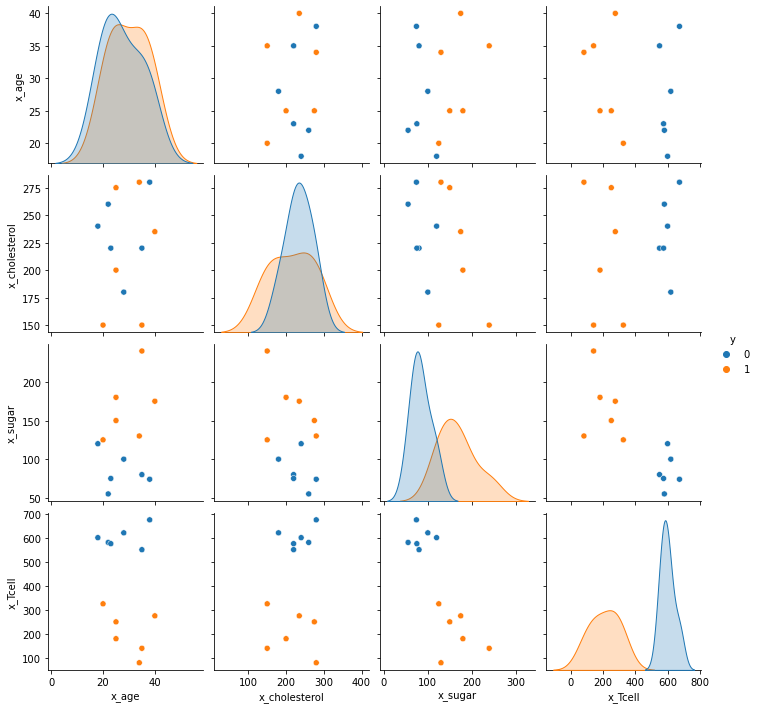

In [214]:
import seaborn as sns
sns.pairplot(data3, hue='y', markers='o')
plt.show()

In [215]:
correlationMatrix = data3.corr(method='spearman')
correlationMatrix

,x_age,x_cholesterol,x_sugar,x_Tcell,y
x_age,1.000000,0.141094,0.217545,-0.175440,0.169576
x_cholesterol,0.141094,1.000000,-0.344469,0.126540,-0.169875
x_sugar,0.217545,-0.344469,1.000000,-0.797203,0.869048
x_Tcell,-0.175440,0.126540,-0.797203,1.000000,-0.869048
y,0.169576,-0.169875,0.869048,-0.869048,1.000000


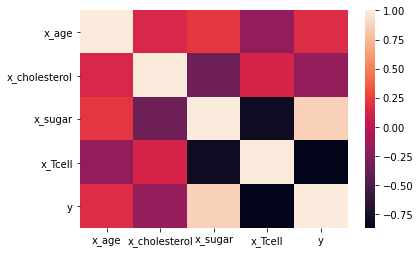

In [216]:
heatMap = sns.heatmap(correlationMatrix)
plt.savefig('calor.png', format='png', dpi=800, bbox_inches="tight")

In [ ]:
def classification_model():
    model = Sequential()
    model.add(Dense(8, activation='relu', input_shape=(n_cols,)))
    model.add(Dense(10, activation='relu'))
    model.add(Dense(10, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    #model.compile(Adam(lr=0.04),'categorical_crossentropy',metrics=['accuracy'])
    return model

In [ ]:
classifier = KerasClassifier(build_fn = classification_model, epochs=200, batch_size=20, verbose=2)

In [ ]:
kfold = KFold(n_splits=5, shuffle=True, random_state=seed)
results = cross_val_score(classifier, x_train, y_train, cv = kfold)
print("Rendimiento del modelo: Media: %.3f%% std: (%.2f%%)" % (results.mean()*100, results.std()*100))

In [ ]:
model = classification_model()
model.fit(x_train, to_categorical(y_train), epochs=200, verbose=0)
scores = model.evaluate(x_test,to_categorical(y_test))
print('Accuracy: {}% \n Error: {}'.format(scores[1], 1 - scores[1]))   

## Punto 4

In [318]:

from numpy.random import seed
from numpy.random import randn
seed(1)


In [319]:
train_size_p4 = 500
p4_x = randn(train_size_p4)
p4_y = randn(train_size_p4)
print(p4_x)
print(p4_y)

[ 1.62434536e+00 -6.11756414e-01 -5.28171752e-01 -1.07296862e+00
  8.65407629e-01 -2.30153870e+00  1.74481176e+00 -7.61206901e-01
  3.19039096e-01 -2.49370375e-01  1.46210794e+00 -2.06014071e+00
 -3.22417204e-01 -3.84054355e-01  1.13376944e+00 -1.09989127e+00
 -1.72428208e-01 -8.77858418e-01  4.22137467e-02  5.82815214e-01
 -1.10061918e+00  1.14472371e+00  9.01590721e-01  5.02494339e-01
  9.00855949e-01 -6.83727859e-01 -1.22890226e-01 -9.35769434e-01
 -2.67888080e-01  5.30355467e-01 -6.91660752e-01 -3.96753527e-01
 -6.87172700e-01 -8.45205641e-01 -6.71246131e-01 -1.26645989e-02
 -1.11731035e+00  2.34415698e-01  1.65980218e+00  7.42044161e-01
 -1.91835552e-01 -8.87628964e-01 -7.47158294e-01  1.69245460e+00
  5.08077548e-02 -6.36995647e-01  1.90915485e-01  2.10025514e+00
  1.20158952e-01  6.17203110e-01  3.00170320e-01 -3.52249846e-01
 -1.14251820e+00 -3.49342722e-01 -2.08894233e-01  5.86623191e-01
  8.38983414e-01  9.31102081e-01  2.85587325e-01  8.85141164e-01
 -7.54397941e-01  1.25286

In [320]:
def cone(x,y):
    return x**2/2 + y**2/2

In [321]:
p4_z = cone(p4_x,p4_y)
print(p4_z)

[2.79740761e+00 1.88754359e-01 4.59120795e-01 6.18144536e-01
 4.08001242e-01 2.66645614e+00 1.68111291e+00 2.93739799e-01
 2.31587722e-01 1.85701666e-01 2.50337447e+00 2.14146873e+00
 6.64042087e-02 7.51206152e-01 8.83094936e-01 8.92213437e-01
 3.41982637e-01 5.40687073e-01 1.72785137e-02 7.82755526e-01
 1.64662820e+00 8.00824280e-01 4.14673240e-01 1.67578109e+00
 8.72869782e-01 4.87961367e-01 8.60638146e-01 6.20604592e-01
 2.38501230e-01 1.13363602e+00 1.55287562e+00 4.03673660e-01
 2.67773113e-01 4.30421740e-01 2.67045416e-01 7.68401789e-02
 8.58120116e-01 8.99246677e-02 2.97578789e+00 3.40781508e-01
 1.08497504e-01 6.61511378e-01 1.50489074e+00 1.94611929e+00
 2.48130605e+00 1.64674908e+00 5.62698863e-02 2.96070173e+00
 8.64883867e-01 8.57462283e-01 6.08277090e-02 1.20277921e+00
 1.16394378e+00 1.15113881e+00 3.20709111e-02 7.05591128e-01
 3.76680584e-01 1.51416126e+00 4.19237214e-01 4.59888242e-01
 6.48603371e-01 7.94598991e-01 1.09248212e+00 1.94652690e-01
 1.45994557e+00 7.838123

In [322]:
dataset = pd.DataFrame({'x': p4_x, 'y': p4_y})
dataset.head()

,x,y
0,1.624345,-1.719394
1,-0.611756,0.057121
2,-0.528172,-0.799547
3,-1.072969,-0.291595
4,0.865408,-0.258983


In [323]:
model = Sequential()
model.add(Dense(60, activation='relu', input_shape=(2,)))
model.add(Dense(40, activation='relu'))
model.add(Dense(1))
    
model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])

In [324]:
resultados = model.fit( dataset,  p4_z, 
                       validation_split=0.3, epochs=500, verbose=0)

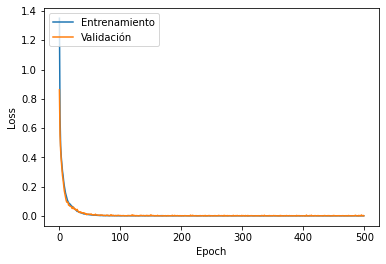

In [325]:
plt.plot(resultados.history['loss'])
plt.plot(resultados.history['val_loss'])
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Entrenamiento', 'Validación'], loc='upper left')
plt.show()

In [343]:
valid_size_p4 = 5000000

In [344]:
b4_x = randn(valid_size_p4)
b4_y = randn(valid_size_p4)

In [345]:
datasetb = pd.DataFrame({'x': b4_x, 'y': b4_y})
datasetb.head()

,x,y
0,-0.665145,-0.465159
1,-0.054479,-1.655417
2,0.516401,-0.097212
3,-0.683103,0.848790
4,0.966265,-0.239508


In [346]:
test_mse_score, test_mae_score = model.evaluate(datasetb, cone(b4_x,b4_y))
test_mae_score

156250/156250 [==============================] - 439s 3ms/step - loss: 0.0019 - mae: 0.0135


0.013487226329743862

In [347]:
predicciones = model.predict(datasetb)
print(cone(b4_x,b4_y))
print(predicciones)

[0.32939522 1.3716875  0.13806023 ... 0.0730626  1.04455942 0.54041763]
[[0.32251027]
 [1.3650267 ]
 [0.13454108]
 ...
 [0.07012789]
 [1.0501087 ]
 [0.5403273 ]]


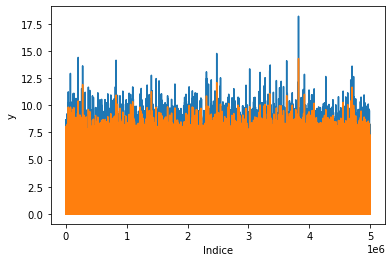

In [348]:
plt.plot(np.arange(valid_size_p4),cone(b4_x,b4_y))
plt.plot(np.arange(valid_size_p4),predicciones)
plt.ylabel('y')
plt.xlabel('Indice')
plt.savefig("plots.pdf")

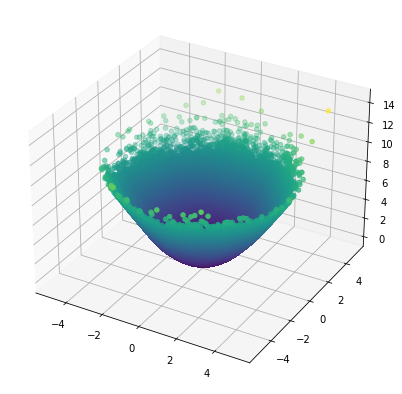

In [349]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot( projection='3d')

ax.scatter(b4_x,b4_y,predicciones,c=predicciones)



In [13]:
lasso_model.predict(testData)

NameError: name 'testData' is not defined

De acuerdo a las gráficas anteriores, se considera entonces que los datos no siguen una distribución normal. Por lo que para el cálculo de la matriz de correlación se una un test de [Spearman](https://en.wikipedia.org/wiki/Spearman%27s_rank_correlation_coefficient).

In [ ]:
correlationMatrix = trainData.corr(method='spearman')
correlationMatrix

El siguiente es el mapa de calor para el test de Spearman.

In [ ]:
heatMap = sns.heatmap(correlationMatrix)
plt.savefig('calor.png', format='png', dpi=800, bbox_inches="tight")

Se observa que existe una correlación fuerte entre algunas de las variables, sin embargo no es lo [suficientemente](https://www.statstutor.ac.uk/resources/uploaded/spearmans.pdf) fuerte para quedarse solo con una de ellas. 

Por otro lado, dado que tanto las variables como los precios no siguen una distribución normal, se prefiere un test no paramétrico de Wilcoxon

In [ ]:
for col in trainData:
    stat, pvalue = wilcoxon(trainData[col],trainDataOrg.SalePrice)
    print('El p-valor entre',col,'y los precios es de',pvalue)

Se observan unos p-valores bastante pequeños, por lo que es posible rechazar la [hipótesis nula](https://dataschool.com/fundamentals-of-analysis/correlation-and-p-value/), la cual nos dice que no existe relación entre cada una de las variables y el precio de venta.

### Generación del modelo
Para generar un modelo de predicción se ha utilizado Lasso.

In [ ]:
lasso_model = Lasso(alpha=0.5,normalize=True, max_iter=1e9)
lasso_model.fit(trainData, trainDataOrg.SalePrice)

Se carga y crea el conjunto de datos de prueba.

In [ ]:
testFile = 'test.csv'
testDataOrg = pd.read_csv(testFile)

In [ ]:
testData = pd.DataFrame(data={ 'YearBuilt': testDataOrg.YearBuilt,
                               'YearRemodAdd': testDataOrg.YearRemodAdd,
                               'OverallCond': testDataOrg.OverallCond,
                               'ExterCond': testDataOrg.ExterCond,
                               'TotalArea': testDataOrg.LotArea + testDataOrg.TotalBsmtSF 
                                    + testDataOrg['1stFlrSF'] + testDataOrg['2ndFlrSF'] 
                                    + testDataOrg.GarageArea + testDataOrg.WoodDeckSF
                                    + testDataOrg.ScreenPorch + testDataOrg.PoolArea 
                                    + testDataOrg['3SsnPorch'] + testDataOrg.EnclosedPorch 
                                    + testDataOrg.OpenPorchSF + testDataOrg.WoodDeckSF,
                               'KitchenQual':testDataOrg.KitchenQual, 
                               'OverallQual': testDataOrg.OverallQual })
testData['ExterCond'].replace(conversion,inplace=True)
testData['KitchenQual'].replace(conversion,inplace=True)
testData.fillna(0,inplace=True)

testData

In [ ]:
lasso_model.predict(testData)

Se grafican los resultados.

In [ ]:
plt.plot(testData.index, lasso_model.predict(testData),'b',alpha=0.6, label='Prediction')
plt.legend(loc='best', frameon=False)
plt.xlabel('x1')
plt.ylabel('y')
plt.show()

### Generación del archivo de salida, prueba con Kaggle
En este apartado se genera el archivo *output.csv* con los valores predecidos para los datos de validación. El objetivo es hacer el *submit* en Kaggle.

In [ ]:
outputData = pd.DataFrame(data={'SalePrice':lasso_model.predict(testData)})
outputData.index += 1461
outputData.to_csv("output.csv", index_label="Id")
outputData

Campo de comentarios varios y programación  **Score: 0.44461** 


<!--

YearBuilt

YearRemodAdd

OverallCond

OverallQual

ExterCond

KitchenQual

LotArea - TotalBsmtSF - 1stFlrSF - 2ndFlrSF - GarageArea - WoodDeckSF
    : ScreenPorch - PoolArea - 3SsnPorch - EnclosedPorch - OpenPorchSF - WoodDeckSF
    
    
    
    'TotalArea': trainDataOrg.LotArea + trainDataOrg.TotalBsmtSF 
+ trainDataOrg['1stFlrSF'] + trainDataOrg['2ndFlrSF'] 
+ trainDataOrg.GarageArea + trainDataOrg.WoodDeckSF
+ trainDataOrg.ScreenPorch + trainDataOrg.PoolArea 
+ trainDataOrg['3SsnPorch'] + trainDataOrg.EnclosedPorch 
+ trainDataOrg.OpenPorchSF + trainDataOrg.WoodDeckSF



                               'TotalArea': testDataOrg.LotArea + testDataOrg.TotalBsmtSF 
                                    + testDataOrg['1stFlrSF'] + testDataOrg['2ndFlrSF'] 
                                    + testDataOrg.GarageArea + testDataOrg.WoodDeckSF
                                    + testDataOrg.ScreenPorch + testDataOrg.PoolArea 
                                    + testDataOrg['3SsnPorch'] + testDataOrg.EnclosedPorch 
                                    + testDataOrg.OpenPorchSF + testDataOrg.WoodDeckSF



testData['ExterCond'].replace(conversion,inplace=True)
testData['KitchenQual'].replace(conversion,inplace=True)
'ExterCond': testDataOrg.ExterCond,
                               'KitchenQual': testDataOrg.KitchenQual 



'TotalArea': trainDataOrg.LotArea + trainDataOrg.TotalBsmtSF 
                                    + trainDataOrg['1stFlrSF'] + trainDataOrg['2ndFlrSF'] 
                                    + trainDataOrg.GarageArea + trainDataOrg.WoodDeckSF
                                    + trainDataOrg.ScreenPorch + trainDataOrg.PoolArea 
                                    + trainDataOrg['3SsnPorch'] + trainDataOrg.EnclosedPorch 
                                    + trainDataOrg.OpenPorchSF + trainDataOrg.WoodDeckSF
 














'TotalArea': testDataOrg.LotArea + testDataOrg.TotalBsmtSF 
                                    + testDataOrg['1stFlrSF'] + testDataOrg['2ndFlrSF'] 
                                    + testDataOrg.GarageArea + testDataOrg.WoodDeckSF
                                    + testDataOrg.ScreenPorch + testDataOrg.PoolArea 
                                    + testDataOrg['3SsnPorch'] + testDataOrg.EnclosedPorch 
                                    + testDataOrg.OpenPorchSF + testDataOrg.WoodDeckSF



-->

